In [ ]:
# evaluating whether GPT can capture many more dependencies in one layer, ie creating
# a much larger delay embedding (as would be necessary due to noise)
# my hypothesis is they can't do this, because attention is sparse.
# adding more heads could allow for it, so we'll investigate that too

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


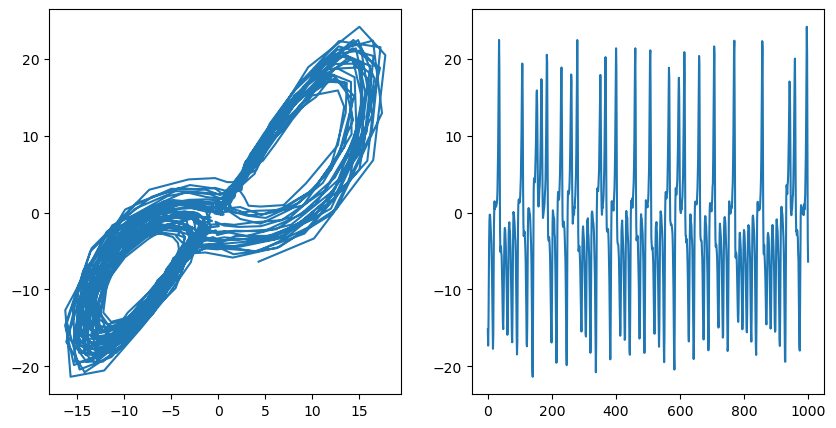

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils import embed_signal_torch
import torch

%load_ext autoreload
%autoreload 2
from dysts.flows import Lorenz
from utils import train, make_dataset

## Load and simulate an attractor
model = Lorenz()
model.dt = 0.05
sol = model.make_trajectory(1000, resample=False, noise=0.0)

sol += np.random.normal(0, 0.3, sol.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(sol[:, 0], sol[:, 1])
ax[1].plot(sol[:, 1])

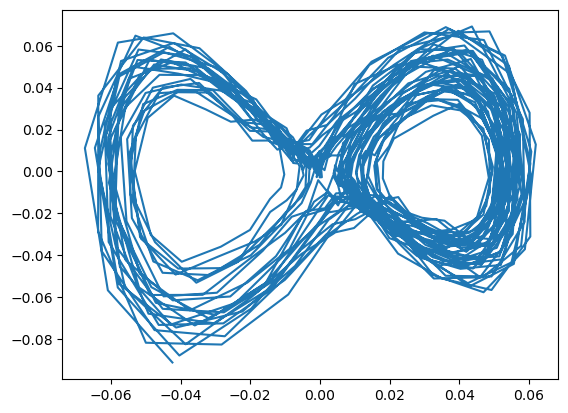

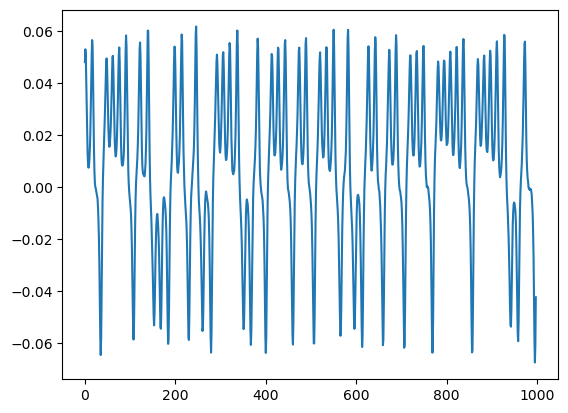

In [3]:
n_delays = 3
delay_interval = 1

H = embed_signal_torch(sol[:, 0:1], n_delays, delay_interval)

U, S, V = torch.svd(H.T)

V = V.cpu().numpy()
plt.plot(V[:, 0], V[:, 1])
plt.figure()
plt.plot(V[:1000, 0])

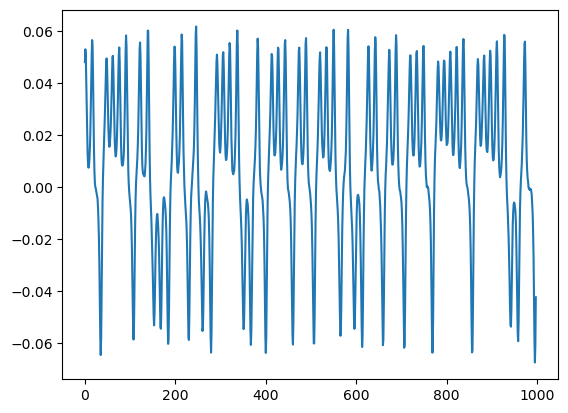

In [4]:
plt.plot(V[:, 0])

In [5]:
import sys

sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings/")
sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings/src")
from models import GPT

(100, 300, 3) torch.Size([100, 100, 1])
(100, 300, 3) torch.Size([100, 100, 1])
(100, 300, 3)


IndexError: index 100 is out of bounds for axis 0 with size 100

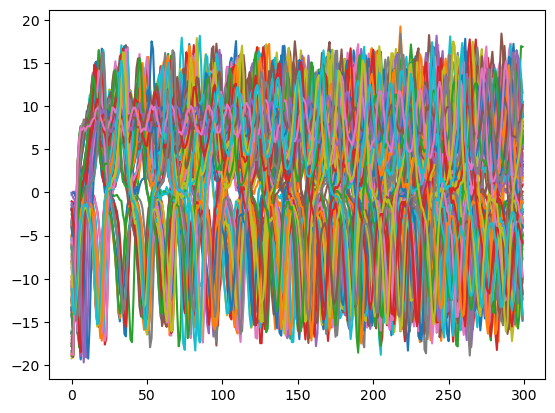

In [6]:
# let's train it
obs_noise = 0.3
batch_size = 16
length = 100
nsamples = 100
dt = 0.05
train_loader, val_loader, train_data, val_data = make_dataset(
    Lorenz, length, nsamples, obs_noise=obs_noise, batch_size=batch_size, dt=dt
)
print(train_data.shape)
plt.figure()
for i in range(0, 1000, 1):
    plt.plot(train_data[i, :1000, 0])

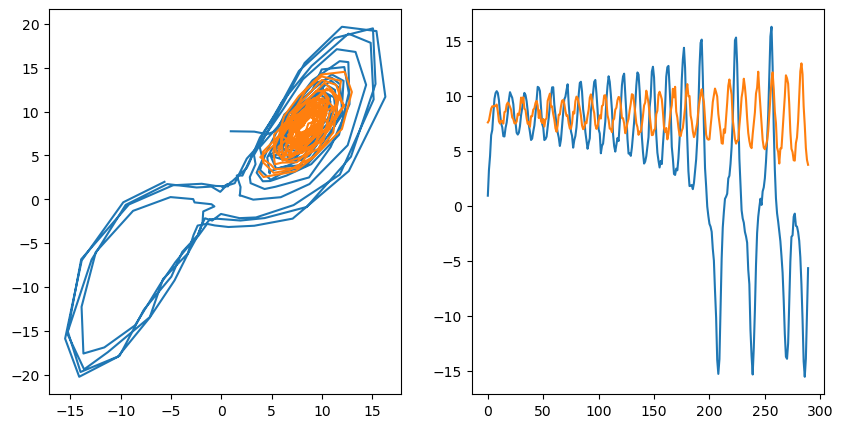

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    ax[0].plot(train_data[i, 10:, 0], train_data[i, 10:, 1])
    ax[1].plot(train_data[i, 10:, 0])

In [15]:
kwargs = dict(
    input_dim=1,
    d_model=100,
    n_head=1,
    context_length=100,
    mlp_hidden=100,
    seed=11,
    temp=None,
    use_pe=False,
)

model = GPT(**kwargs)

In [18]:
from torch.optim import AdamW
import torch.nn as nn

epochs = 1000
lr = 1e-3

model, train_loss, val_loss = train(
    model, train_loader, val_loader, epochs, lr, AdamW, nn.MSELoss(), "cuda"
)

  0%|          | 2/1000 [00:00<02:14,  7.40it/s]

Epoch 0 Training Loss: 43.390525000435964
Epoch 0 Validation Loss: 24.173242841448104
Epoch 1 Training Loss: 18.801947866167342
Epoch 1 Validation Loss: 17.838218144008092


  0%|          | 5/1000 [00:00<01:40,  9.94it/s]

Epoch 2 Training Loss: 16.819088663373673
Epoch 2 Validation Loss: 16.16768196650914
Epoch 3 Training Loss: 15.606029919215612
Epoch 3 Validation Loss: 14.45542390005929
Epoch 4 Training Loss: 13.171714101518903
Epoch 4 Validation Loss: 11.852244649614606


  1%|          | 6/1000 [00:00<02:25,  6.85it/s]

Epoch 5 Training Loss: 10.670616013663155
Epoch 5 Validation Loss: 9.084590435028076
Epoch 6 Training Loss: 7.88479266847883
Epoch 6 Validation Loss: 6.384191921779087


  1%|          | 9/1000 [00:01<01:53,  8.73it/s]

Epoch 7 Training Loss: 5.904788153512137
Epoch 7 Validation Loss: 5.12316015788487
Epoch 8 Training Loss: 4.610355683735439
Epoch 8 Validation Loss: 4.981656278882708


  1%|          | 11/1000 [00:01<02:16,  7.23it/s]

Epoch 9 Training Loss: 4.490823030471802
Epoch 9 Validation Loss: 4.84006084714617
Epoch 10 Training Loss: 4.814536026545933
Epoch 10 Validation Loss: 4.733656474522182


  1%|▏         | 14/1000 [00:01<01:47,  9.19it/s]

Epoch 11 Training Loss: 4.6480110713413785
Epoch 11 Validation Loss: 4.347314698355539
Epoch 12 Training Loss: 4.268354960850307
Epoch 12 Validation Loss: 4.6826072079794745
Epoch 13 Training Loss: 4.035976409912109
Epoch 13 Validation Loss: 3.999002047947475


  2%|▏         | 16/1000 [00:01<02:02,  8.06it/s]

Epoch 14 Training Loss: 3.976844617298671
Epoch 14 Validation Loss: 4.066256420952933
Epoch 15 Training Loss: 3.884136268070766
Epoch 15 Validation Loss: 3.97182491847447


  2%|▏         | 17/1000 [00:02<01:59,  8.24it/s]

Epoch 16 Training Loss: 3.79283002444676
Epoch 16 Validation Loss: 3.8315326826913014
Epoch 17 Training Loss: 3.6637745584760393
Epoch 17 Validation Loss: 3.8171067578451976


  2%|▏         | 20/1000 [00:02<01:59,  8.18it/s]

Epoch 18 Training Loss: 3.7247706821986606
Epoch 18 Validation Loss: 3.7242776666368758
Epoch 19 Training Loss: 3.602662972041539
Epoch 19 Validation Loss: 3.7454354422433034


  2%|▏         | 22/1000 [00:02<01:41,  9.65it/s]

Epoch 20 Training Loss: 3.5493549278804233
Epoch 20 Validation Loss: 3.719632012503488
Epoch 21 Training Loss: 3.5576291424887523
Epoch 21 Validation Loss: 3.7131995132991245
Epoch 22 Training Loss: 3.5851474830082486
Epoch 22 Validation Loss: 3.621924264090402


  2%|▎         | 25/1000 [00:02<01:42,  9.50it/s]

Epoch 23 Training Loss: 3.555297408785139
Epoch 23 Validation Loss: 3.6614030429295132
Epoch 24 Training Loss: 3.5303846427372525
Epoch 24 Validation Loss: 3.5573878969464983


  3%|▎         | 27/1000 [00:03<01:35, 10.18it/s]

Epoch 25 Training Loss: 3.5222956112452914
Epoch 25 Validation Loss: 3.7544033186776296
Epoch 26 Training Loss: 3.507350819451468
Epoch 26 Validation Loss: 4.0517317567552835
Epoch 27 Training Loss: 3.8921521731785367
Epoch 27 Validation Loss: 4.55688442502703


  3%|▎         | 30/1000 [00:03<02:17,  7.04it/s]

Epoch 28 Training Loss: 4.818343571254185
Epoch 28 Validation Loss: 4.560801574162075
Epoch 29 Training Loss: 4.250741583960397
Epoch 29 Validation Loss: 4.6560587882995605


  3%|▎         | 34/1000 [00:03<01:26, 11.13it/s]

Epoch 30 Training Loss: 4.077490772519793
Epoch 30 Validation Loss: 3.849915095738002
Epoch 31 Training Loss: 3.78454099382673
Epoch 31 Validation Loss: 3.91814923286438
Epoch 32 Training Loss: 3.8198394775390625
Epoch 32 Validation Loss: 3.8632450103759766
Epoch 33 Training Loss: 3.9135472774505615
Epoch 33 Validation Loss: 3.642456531524658


  4%|▍         | 38/1000 [00:04<01:06, 14.39it/s]

Epoch 34 Training Loss: 3.8899568830217635
Epoch 34 Validation Loss: 3.9942759786333357
Epoch 35 Training Loss: 3.8051717962537492
Epoch 35 Validation Loss: 3.672117676053728
Epoch 36 Training Loss: 3.6155405725751604
Epoch 36 Validation Loss: 3.540278196334839
Epoch 37 Training Loss: 3.4848550387791226
Epoch 37 Validation Loss: 3.553013733455113


  4%|▍         | 42/1000 [00:04<00:57, 16.53it/s]

Epoch 38 Training Loss: 3.482537235532488
Epoch 38 Validation Loss: 3.6877104554857527
Epoch 39 Training Loss: 3.61464330128261
Epoch 39 Validation Loss: 3.5808585371289934
Epoch 40 Training Loss: 3.538501807621547
Epoch 40 Validation Loss: 3.5339208330426897
Epoch 41 Training Loss: 3.5297401632581438
Epoch 41 Validation Loss: 3.470676694597517


  5%|▍         | 46/1000 [00:04<00:56, 16.79it/s]

Epoch 42 Training Loss: 3.5234945842197964
Epoch 42 Validation Loss: 3.4492876870291576
Epoch 43 Training Loss: 3.427281992776053
Epoch 43 Validation Loss: 3.509693350110735
Epoch 44 Training Loss: 3.3611458710261752
Epoch 44 Validation Loss: 3.4932004724230086
Epoch 45 Training Loss: 3.450099536350795
Epoch 45 Validation Loss: 3.5633396761757985


  5%|▌         | 50/1000 [00:04<00:54, 17.31it/s]

Epoch 46 Training Loss: 3.327181952340262
Epoch 46 Validation Loss: 3.6584263869694302
Epoch 47 Training Loss: 3.4355400289808
Epoch 47 Validation Loss: 3.6425911358424594
Epoch 48 Training Loss: 3.485326256070818
Epoch 48 Validation Loss: 3.6305915287562778
Epoch 49 Training Loss: 3.7522216524396623
Epoch 49 Validation Loss: 3.7565781388963972


  5%|▌         | 54/1000 [00:04<00:51, 18.23it/s]

Epoch 50 Training Loss: 3.449532917567662
Epoch 50 Validation Loss: 3.541642393384661
Epoch 51 Training Loss: 3.4210898876190186
Epoch 51 Validation Loss: 3.4670508248465404
Epoch 52 Training Loss: 3.5286435399736678
Epoch 52 Validation Loss: 3.7373381001608714
Epoch 53 Training Loss: 3.4343462330954417
Epoch 53 Validation Loss: 3.7742628029414584
Epoch 54 Training Loss: 3.471508707318987


  6%|▌         | 59/1000 [00:05<00:48, 19.28it/s]

Epoch 54 Validation Loss: 3.518324715750558
Epoch 55 Training Loss: 3.386307409831456
Epoch 55 Validation Loss: 3.5944663797106062
Epoch 56 Training Loss: 3.2880052498408725
Epoch 56 Validation Loss: 3.6621781417301724
Epoch 57 Training Loss: 3.462165798459734
Epoch 57 Validation Loss: 3.3936147008623396
Epoch 58 Training Loss: 3.4577366965157643
Epoch 58 Validation Loss: 3.7287823813302174


  6%|▌         | 62/1000 [00:05<00:47, 19.86it/s]

Epoch 59 Training Loss: 3.5527400629861012
Epoch 59 Validation Loss: 3.581903798239572
Epoch 60 Training Loss: 3.2571371282849992
Epoch 60 Validation Loss: 3.4280713285718645
Epoch 61 Training Loss: 3.298098257609776
Epoch 61 Validation Loss: 3.3002892562321255
Epoch 62 Training Loss: 3.21603638785226
Epoch 62 Validation Loss: 3.3834314346313477
Epoch 63 Training Loss: 3.220517771584647


  7%|▋         | 68/1000 [00:05<00:46, 20.18it/s]

Epoch 63 Validation Loss: 3.378905807222639
Epoch 64 Training Loss: 3.1863199302128384
Epoch 64 Validation Loss: 3.3169190543038503
Epoch 65 Training Loss: 3.1790707792554582
Epoch 65 Validation Loss: 3.4819446972438266
Epoch 66 Training Loss: 3.3458608899797713
Epoch 66 Validation Loss: 3.344644444329398
Epoch 67 Training Loss: 3.3754449571881975
Epoch 67 Validation Loss: 3.457848310470581


  7%|▋         | 71/1000 [00:05<00:45, 20.31it/s]

Epoch 68 Training Loss: 3.4673822607312883
Epoch 68 Validation Loss: 3.5559815679277693
Epoch 69 Training Loss: 3.3722356046949113
Epoch 69 Validation Loss: 3.4299947874886647
Epoch 70 Training Loss: 3.2492617198399136
Epoch 70 Validation Loss: 3.505056074687413
Epoch 71 Training Loss: 3.25153797013419
Epoch 71 Validation Loss: 3.4571477685655867
Epoch 72 Training Loss: 3.113958937781198


  8%|▊         | 77/1000 [00:06<00:44, 20.61it/s]

Epoch 72 Validation Loss: 3.3976037161690846
Epoch 73 Training Loss: 3.312702144895281
Epoch 73 Validation Loss: 3.9878943988255093
Epoch 74 Training Loss: 3.5571380342756
Epoch 74 Validation Loss: 3.3240725653512135
Epoch 75 Training Loss: 3.251860959189279
Epoch 75 Validation Loss: 3.307464838027954
Epoch 76 Training Loss: 3.3236686161586215
Epoch 76 Validation Loss: 3.4853429794311523


  8%|▊         | 80/1000 [00:06<00:44, 20.54it/s]

Epoch 77 Training Loss: 3.3139540808541432
Epoch 77 Validation Loss: 3.4041829790387834
Epoch 78 Training Loss: 3.239120994295393
Epoch 78 Validation Loss: 3.5663130283355713
Epoch 79 Training Loss: 3.3772753306797574
Epoch 79 Validation Loss: 3.536487579345703
Epoch 80 Training Loss: 3.2707618304661343
Epoch 80 Validation Loss: 3.6433585030691966
Epoch 81 Training Loss: 3.291677951812744


  9%|▊         | 86/1000 [00:06<00:45, 20.30it/s]

Epoch 81 Validation Loss: 3.4270596163613454
Epoch 82 Training Loss: 3.2984135832105363
Epoch 82 Validation Loss: 3.341406890324184
Epoch 83 Training Loss: 3.30466958454677
Epoch 83 Validation Loss: 3.3189560345241
Epoch 84 Training Loss: 3.312047243118286
Epoch 84 Validation Loss: 3.7169475896017894
Epoch 85 Training Loss: 3.5259481838771274
Epoch 85 Validation Loss: 3.515970843178885


  9%|▉         | 89/1000 [00:06<00:44, 20.34it/s]

Epoch 86 Training Loss: 3.340404919215611
Epoch 86 Validation Loss: 3.3982071535927907
Epoch 87 Training Loss: 3.384945903505598
Epoch 87 Validation Loss: 3.427498919623239
Epoch 88 Training Loss: 3.1592928000858853
Epoch 88 Validation Loss: 3.5345801966530934
Epoch 89 Training Loss: 3.168117114475795
Epoch 89 Validation Loss: 3.3704063211168562
Epoch 90 Training Loss: 3.191264731543405


 10%|▉         | 95/1000 [00:06<00:42, 21.08it/s]

Epoch 90 Validation Loss: 3.3380793162754605
Epoch 91 Training Loss: 3.2661337511880055
Epoch 91 Validation Loss: 3.4351858411516463
Epoch 92 Training Loss: 3.1880004746573314
Epoch 92 Validation Loss: 3.282349007470267
Epoch 93 Training Loss: 3.1890198503221785
Epoch 93 Validation Loss: 3.2956350530896867
Epoch 94 Training Loss: 3.1739402498517717
Epoch 94 Validation Loss: 3.2971482958112444


 10%|▉         | 98/1000 [00:07<00:43, 20.96it/s]

Epoch 95 Training Loss: 3.258404084614345
Epoch 95 Validation Loss: 3.3601389271872386
Epoch 96 Training Loss: 3.238760846001761
Epoch 96 Validation Loss: 3.2511494840894426
Epoch 97 Training Loss: 3.2729783739362444
Epoch 97 Validation Loss: 3.3346452372414723
Epoch 98 Training Loss: 3.171562807900565
Epoch 98 Validation Loss: 3.2642836570739746


 10%|█         | 101/1000 [00:07<00:44, 20.21it/s]

Epoch 99 Training Loss: 3.1766665322440013
Epoch 99 Validation Loss: 3.236244099480765
Epoch 100 Training Loss: 3.132448979786464
Epoch 100 Validation Loss: 3.764469861984253
Epoch 101 Training Loss: 3.429588794708252
Epoch 101 Validation Loss: 3.4918878419058665
Epoch 102 Training Loss: 3.3299573489597867
Epoch 102 Validation Loss: 3.273754528590611


 11%|█         | 106/1000 [00:07<00:45, 19.45it/s]

Epoch 103 Training Loss: 3.3265739509037564
Epoch 103 Validation Loss: 3.2160276685442244
Epoch 104 Training Loss: 3.277951342718942
Epoch 104 Validation Loss: 3.2941790989467075
Epoch 105 Training Loss: 3.3087712356022427
Epoch 105 Validation Loss: 3.1493057182856967
Epoch 106 Training Loss: 3.0956174305507114
Epoch 106 Validation Loss: 3.1851606369018555


 11%|█         | 110/1000 [00:07<00:45, 19.50it/s]

Epoch 107 Training Loss: 3.103767122541155
Epoch 107 Validation Loss: 3.297701392854963
Epoch 108 Training Loss: 3.1220666681017195
Epoch 108 Validation Loss: 3.2856531824384416
Epoch 109 Training Loss: 3.1802500316074918
Epoch 109 Validation Loss: 3.412640230996268
Epoch 110 Training Loss: 3.313472407204764
Epoch 110 Validation Loss: 3.4293083122798373
Epoch 111 Training Loss: 3.4664199692862376


 11%|█▏        | 114/1000 [00:07<00:46, 19.09it/s]

Epoch 111 Validation Loss: 3.1904663358415877
Epoch 112 Training Loss: 3.299590587615967
Epoch 112 Validation Loss: 3.3420493602752686
Epoch 113 Training Loss: 3.2609855788094655
Epoch 113 Validation Loss: 3.2562955788203647
Epoch 114 Training Loss: 3.1471756867000034
Epoch 114 Validation Loss: 3.2898919582366943
Epoch 115 Training Loss: 3.1801182542528426


 12%|█▏        | 119/1000 [00:08<00:45, 19.49it/s]

Epoch 115 Validation Loss: 3.3999486650739397
Epoch 116 Training Loss: 3.1286959988730296
Epoch 116 Validation Loss: 3.264476469584874
Epoch 117 Training Loss: 3.086282900401524
Epoch 117 Validation Loss: 3.541955198560442
Epoch 118 Training Loss: 3.257590191704886
Epoch 118 Validation Loss: 3.2214040756225586
Epoch 119 Training Loss: 3.1091951302119663
Epoch 119 Validation Loss: 3.4770454338618686


 12%|█▏        | 122/1000 [00:08<00:44, 19.84it/s]

Epoch 120 Training Loss: 3.286102601460048
Epoch 120 Validation Loss: 3.424938644681658
Epoch 121 Training Loss: 3.217161382947649
Epoch 121 Validation Loss: 3.418408223560878
Epoch 122 Training Loss: 3.2226143223898753
Epoch 122 Validation Loss: 3.487444979803903
Epoch 123 Training Loss: 3.221257141658238
Epoch 123 Validation Loss: 3.7571725845336914
Epoch 124 Training Loss: 3.336014815739223


 13%|█▎        | 127/1000 [00:08<00:43, 19.90it/s]

Epoch 124 Validation Loss: 3.3660972458975658
Epoch 125 Training Loss: 3.1502536705562045
Epoch 125 Validation Loss: 3.3002005304609026
Epoch 126 Training Loss: 3.183457817350115
Epoch 126 Validation Loss: 3.5051699025290355
Epoch 127 Training Loss: 3.238191229956491
Epoch 127 Validation Loss: 3.2442818709782193
Epoch 128 Training Loss: 3.0579024723597934


 13%|█▎        | 131/1000 [00:08<00:44, 19.60it/s]

Epoch 128 Validation Loss: 3.2382844516209195
Epoch 129 Training Loss: 3.0713673659733365
Epoch 129 Validation Loss: 3.210439784186227
Epoch 130 Training Loss: 3.1296116283961704
Epoch 130 Validation Loss: 3.314417600631714
Epoch 131 Training Loss: 3.1863677501678467
Epoch 131 Validation Loss: 3.355825526373727
Epoch 132 Training Loss: 3.187417813709804


 14%|█▎        | 135/1000 [00:09<00:44, 19.40it/s]

Epoch 132 Validation Loss: 3.7095065457480296
Epoch 133 Training Loss: 3.2223667076655795
Epoch 133 Validation Loss: 3.2459985528673445
Epoch 134 Training Loss: 3.163611275809152
Epoch 134 Validation Loss: 3.303269863128662
Epoch 135 Training Loss: 3.2535527433667863
Epoch 135 Validation Loss: 3.245030266898019
Epoch 136 Training Loss: 2.983958056994847


 14%|█▍        | 139/1000 [00:09<00:44, 19.21it/s]

Epoch 136 Validation Loss: 3.2039875643593922
Epoch 137 Training Loss: 3.0843022891453336
Epoch 137 Validation Loss: 3.1431240013667514
Epoch 138 Training Loss: 3.090566430773054
Epoch 138 Validation Loss: 3.1720809595925465
Epoch 139 Training Loss: 3.112023285457066
Epoch 139 Validation Loss: 3.1187898090907504
Epoch 140 Training Loss: 3.0261293138776506


 14%|█▍        | 143/1000 [00:09<00:44, 19.05it/s]

Epoch 140 Validation Loss: 3.264064039502825
Epoch 141 Training Loss: 3.1649621554783414
Epoch 141 Validation Loss: 3.262424503053938
Epoch 142 Training Loss: 3.081644432885306
Epoch 142 Validation Loss: 3.201657397406442
Epoch 143 Training Loss: 3.084806408200945
Epoch 143 Validation Loss: 3.5351761068616594
Epoch 144 Training Loss: 3.2544709273747037


 15%|█▍        | 147/1000 [00:09<00:44, 19.05it/s]

Epoch 144 Validation Loss: 3.243614537375314
Epoch 145 Training Loss: 3.12486161504473
Epoch 145 Validation Loss: 3.2784548827580045
Epoch 146 Training Loss: 3.1113430772508894
Epoch 146 Validation Loss: 3.1281636442456926
Epoch 147 Training Loss: 3.0748933042798723
Epoch 147 Validation Loss: 3.505356788635254
Epoch 148 Training Loss: 3.1952404294695174


 15%|█▌        | 152/1000 [00:09<00:43, 19.37it/s]

Epoch 148 Validation Loss: 3.3699820041656494
Epoch 149 Training Loss: 3.1038456644330705
Epoch 149 Validation Loss: 3.202558789934431
Epoch 150 Training Loss: 3.212496042251587
Epoch 150 Validation Loss: 3.1112962450299944
Epoch 151 Training Loss: 3.1417104176112582
Epoch 151 Validation Loss: 3.2546962329319546
Epoch 152 Training Loss: 3.1576762539999828


 16%|█▌        | 156/1000 [00:10<00:43, 19.23it/s]

Epoch 152 Validation Loss: 3.380408150809152
Epoch 153 Training Loss: 3.0958552019936696
Epoch 153 Validation Loss: 3.214132785797119
Epoch 154 Training Loss: 3.0961053712027415
Epoch 154 Validation Loss: 3.4442042963845387
Epoch 155 Training Loss: 3.192395039967128
Epoch 155 Validation Loss: 3.5635190350668773
Epoch 156 Training Loss: 3.206669432776315


 16%|█▌        | 160/1000 [00:10<00:44, 19.04it/s]

Epoch 156 Validation Loss: 3.331390448978969
Epoch 157 Training Loss: 3.2042008468082974
Epoch 157 Validation Loss: 3.6282384395599365
Epoch 158 Training Loss: 3.2365770680563792
Epoch 158 Validation Loss: 3.5449037892477855
Epoch 159 Training Loss: 3.1339974403381348
Epoch 159 Validation Loss: 3.231809513909476
Epoch 160 Training Loss: 3.175164154597691


 16%|█▋        | 164/1000 [00:10<00:43, 19.03it/s]

Epoch 160 Validation Loss: 3.2371201515197754
Epoch 161 Training Loss: 3.0248282296316966
Epoch 161 Validation Loss: 3.1934424809047153
Epoch 162 Training Loss: 3.0724359239850725
Epoch 162 Validation Loss: 3.034719705581665
Epoch 163 Training Loss: 3.0267694337027415
Epoch 163 Validation Loss: 3.0977114949907576
Epoch 164 Training Loss: 3.1058744362422397


 17%|█▋        | 168/1000 [00:10<00:42, 19.41it/s]

Epoch 164 Validation Loss: 3.507481268474034
Epoch 165 Training Loss: 3.4151414462498257
Epoch 165 Validation Loss: 3.4279794011797224
Epoch 166 Training Loss: 3.2948059354509627
Epoch 166 Validation Loss: 3.6139799867357527
Epoch 167 Training Loss: 3.3071575505392894
Epoch 167 Validation Loss: 3.3781418800354004
Epoch 168 Training Loss: 3.1594014508383617


 17%|█▋        | 172/1000 [00:10<00:43, 19.02it/s]

Epoch 168 Validation Loss: 3.6414108276367188
Epoch 169 Training Loss: 3.231977871486119
Epoch 169 Validation Loss: 3.6834977013724193
Epoch 170 Training Loss: 3.1721173354557584
Epoch 170 Validation Loss: 3.147112948553903
Epoch 171 Training Loss: 3.0930191789354597
Epoch 171 Validation Loss: 3.12122688974653
Epoch 172 Training Loss: 3.0007992131369456


 18%|█▊        | 176/1000 [00:11<00:43, 19.03it/s]

Epoch 172 Validation Loss: 3.0827327455793108
Epoch 173 Training Loss: 3.128587552479335
Epoch 173 Validation Loss: 3.0471043246132985
Epoch 174 Training Loss: 2.949336460658482
Epoch 174 Validation Loss: 3.0576158251081194
Epoch 175 Training Loss: 2.903240271977016
Epoch 175 Validation Loss: 3.214777333395822
Epoch 176 Training Loss: 2.9337304660252164


 18%|█▊        | 180/1000 [00:11<00:42, 19.19it/s]

Epoch 176 Validation Loss: 2.9978548118046353
Epoch 177 Training Loss: 2.8740383897508894
Epoch 177 Validation Loss: 3.1392907415117537
Epoch 178 Training Loss: 2.893953732081822
Epoch 178 Validation Loss: 3.1773827416556224
Epoch 179 Training Loss: 2.917139325823103
Epoch 179 Validation Loss: 3.033155918121338
Epoch 180 Training Loss: 2.9040047100612094


 18%|█▊        | 184/1000 [00:11<00:42, 19.20it/s]

Epoch 180 Validation Loss: 3.1461067540305003
Epoch 181 Training Loss: 3.045762538909912
Epoch 181 Validation Loss: 3.1754099300929477
Epoch 182 Training Loss: 2.8372222696031844
Epoch 182 Validation Loss: 2.9118432317461287
Epoch 183 Training Loss: 2.7287708009992326
Epoch 183 Validation Loss: 2.9130028997148787
Epoch 184 Training Loss: 2.927577699933733


 19%|█▉        | 188/1000 [00:11<00:42, 19.04it/s]

Epoch 184 Validation Loss: 3.217656237738473
Epoch 185 Training Loss: 2.958352565765381
Epoch 185 Validation Loss: 3.100343806403024
Epoch 186 Training Loss: 2.9415843146187917
Epoch 186 Validation Loss: 3.1734661715371266
Epoch 187 Training Loss: 2.932824509484427
Epoch 187 Validation Loss: 2.9527319840022495
Epoch 188 Training Loss: 2.8926993097577776


 19%|█▉        | 192/1000 [00:12<00:42, 19.02it/s]

Epoch 188 Validation Loss: 2.9525876385825023
Epoch 189 Training Loss: 2.8762102808271135
Epoch 189 Validation Loss: 3.2489981651306152
Epoch 190 Training Loss: 3.0663816928863525
Epoch 190 Validation Loss: 3.204622779573713
Epoch 191 Training Loss: 3.288522345679147
Epoch 191 Validation Loss: 3.9371578012193953
Epoch 192 Training Loss: 3.4455819129943848


 20%|█▉        | 196/1000 [00:12<00:41, 19.18it/s]

Epoch 192 Validation Loss: 3.262164286204747
Epoch 193 Training Loss: 3.026890584400722
Epoch 193 Validation Loss: 3.554577350616455
Epoch 194 Training Loss: 3.0108885083879744
Epoch 194 Validation Loss: 3.235321726117815
Epoch 195 Training Loss: 2.986601863588606
Epoch 195 Validation Loss: 3.420961993081229
Epoch 196 Training Loss: 2.839379685265677


 20%|██        | 200/1000 [00:12<00:41, 19.06it/s]

Epoch 196 Validation Loss: 3.0541701316833496
Epoch 197 Training Loss: 2.7980901854378835
Epoch 197 Validation Loss: 2.9852518354143416
Epoch 198 Training Loss: 2.911368267876761
Epoch 198 Validation Loss: 2.9293393066951205
Epoch 199 Training Loss: 2.7244095461709157
Epoch 199 Validation Loss: 3.0916077068873813
Epoch 200 Training Loss: 2.897040435246059


 20%|██        | 204/1000 [00:12<00:41, 19.06it/s]

Epoch 200 Validation Loss: 3.094369888305664
Epoch 201 Training Loss: 3.1861600194658553
Epoch 201 Validation Loss: 3.260504995073591
Epoch 202 Training Loss: 3.1534136704036166
Epoch 202 Validation Loss: 3.1004980632237027
Epoch 203 Training Loss: 2.908682414463588
Epoch 203 Validation Loss: 3.1206859179905484
Epoch 204 Training Loss: 2.915780987058367


 21%|██        | 208/1000 [00:12<00:41, 19.29it/s]

Epoch 204 Validation Loss: 2.972045728138515
Epoch 205 Training Loss: 2.7606070041656494
Epoch 205 Validation Loss: 2.91965457371303
Epoch 206 Training Loss: 2.8077858175550188
Epoch 206 Validation Loss: 3.460688488824027
Epoch 207 Training Loss: 3.1918741975511824
Epoch 207 Validation Loss: 3.303992748260498
Epoch 208 Training Loss: 3.020717212132045


 21%|██        | 212/1000 [00:13<00:41, 19.16it/s]

Epoch 208 Validation Loss: 3.088031462260655
Epoch 209 Training Loss: 3.1492599078587125
Epoch 209 Validation Loss: 3.054915394101824
Epoch 210 Training Loss: 2.9902676854814803
Epoch 210 Validation Loss: 2.936036927359445
Epoch 211 Training Loss: 2.8684218611036028
Epoch 211 Validation Loss: 2.841339588165283
Epoch 212 Training Loss: 2.763927255358015


 22%|██▏       | 216/1000 [00:13<00:40, 19.15it/s]

Epoch 212 Validation Loss: 2.9484072412763322
Epoch 213 Training Loss: 2.64373847416469
Epoch 213 Validation Loss: 2.6932296752929688
Epoch 214 Training Loss: 2.6328345026288713
Epoch 214 Validation Loss: 2.718276228223528
Epoch 215 Training Loss: 2.7918343544006348
Epoch 215 Validation Loss: 2.9404280526297435
Epoch 216 Training Loss: 2.670567103794643


 22%|██▏       | 220/1000 [00:13<00:41, 18.99it/s]

Epoch 216 Validation Loss: 2.9163731847490584
Epoch 217 Training Loss: 2.732401098523821
Epoch 217 Validation Loss: 2.851461478642055
Epoch 218 Training Loss: 2.553044216973441
Epoch 218 Validation Loss: 3.018253667013986
Epoch 219 Training Loss: 2.8658465317317416
Epoch 219 Validation Loss: 3.2490149566105435
Epoch 220 Training Loss: 3.539025204522269


 22%|██▎       | 225/1000 [00:13<00:39, 19.43it/s]

Epoch 220 Validation Loss: 2.875655038016183
Epoch 221 Training Loss: 2.9794202872685025
Epoch 221 Validation Loss: 2.8521660055433
Epoch 222 Training Loss: 2.757714646203177
Epoch 222 Validation Loss: 2.7412784780774797
Epoch 223 Training Loss: 2.587477820260184
Epoch 223 Validation Loss: 3.059748819896153
Epoch 224 Training Loss: 2.7963071891239712
Epoch 224 Validation Loss: 3.3409793376922607


 23%|██▎       | 229/1000 [00:13<00:40, 19.23it/s]

Epoch 225 Training Loss: 3.1216817242758617
Epoch 225 Validation Loss: 2.823906115123204
Epoch 226 Training Loss: 2.6406729221343994
Epoch 226 Validation Loss: 2.675105026790074
Epoch 227 Training Loss: 2.670653751918248
Epoch 227 Validation Loss: 2.7551475252423967
Epoch 228 Training Loss: 2.7363192353929793
Epoch 228 Validation Loss: 2.7409465653555736


 23%|██▎       | 233/1000 [00:14<00:39, 19.41it/s]

Epoch 229 Training Loss: 2.757295233862741
Epoch 229 Validation Loss: 2.627596855163574
Epoch 230 Training Loss: 2.666042225701468
Epoch 230 Validation Loss: 2.782343796321324
Epoch 231 Training Loss: 2.611382382256644
Epoch 231 Validation Loss: 2.938971962247576
Epoch 232 Training Loss: 3.2509052072252547
Epoch 232 Validation Loss: 3.68176599911281


 24%|██▎       | 237/1000 [00:14<00:39, 19.16it/s]

Epoch 233 Training Loss: 2.9963697705950056
Epoch 233 Validation Loss: 3.043910026550293
Epoch 234 Training Loss: 2.9991890702928816
Epoch 234 Validation Loss: 3.468496254512242
Epoch 235 Training Loss: 2.833062325205122
Epoch 235 Validation Loss: 2.9269206864493236
Epoch 236 Training Loss: 2.60615382875715
Epoch 236 Validation Loss: 2.817030736378261


 24%|██▍       | 241/1000 [00:14<00:39, 19.06it/s]

Epoch 237 Training Loss: 2.6108168874468123
Epoch 237 Validation Loss: 2.908479963030134
Epoch 238 Training Loss: 2.6415680135999406
Epoch 238 Validation Loss: 3.346170323235648
Epoch 239 Training Loss: 2.759142671312605
Epoch 239 Validation Loss: 2.594585827418736
Epoch 240 Training Loss: 2.529354844774519
Epoch 240 Validation Loss: 2.5247059209006175


 24%|██▍       | 245/1000 [00:14<00:39, 19.14it/s]

Epoch 241 Training Loss: 2.6275670869009837
Epoch 241 Validation Loss: 3.0127695628574918
Epoch 242 Training Loss: 2.8101630551474437
Epoch 242 Validation Loss: 3.0788230895996094
Epoch 243 Training Loss: 2.9991470745631625
Epoch 243 Validation Loss: 2.95429641859872
Epoch 244 Training Loss: 2.6785263334001814
Epoch 244 Validation Loss: 2.691929953438895
Epoch 245 Training Loss: 2.6112306118011475


 25%|██▍       | 249/1000 [00:14<00:39, 19.10it/s]

Epoch 245 Validation Loss: 2.5215589659554616
Epoch 246 Training Loss: 2.570697103227888
Epoch 246 Validation Loss: 2.5858312334333147
Epoch 247 Training Loss: 2.54156722341265
Epoch 247 Validation Loss: 3.0442307335989818
Epoch 248 Training Loss: 2.521120071411133
Epoch 248 Validation Loss: 2.659902197974069
Epoch 249 Training Loss: 2.463097333908081


 25%|██▌       | 253/1000 [00:15<00:38, 19.20it/s]

Epoch 249 Validation Loss: 3.0316273825509206
Epoch 250 Training Loss: 3.0702912466866628
Epoch 250 Validation Loss: 2.7282306126185825
Epoch 251 Training Loss: 2.4764619214194163
Epoch 251 Validation Loss: 2.7112430163792203
Epoch 252 Training Loss: 2.5982983793531145
Epoch 252 Validation Loss: 2.99989230292184
Epoch 253 Training Loss: 2.7240738528115407


 26%|██▌       | 257/1000 [00:15<00:39, 18.94it/s]

Epoch 253 Validation Loss: 2.681416000638689
Epoch 254 Training Loss: 2.6390203407832553
Epoch 254 Validation Loss: 2.825134720121111
Epoch 255 Training Loss: 2.636637347085135
Epoch 255 Validation Loss: 2.6124426977975026
Epoch 256 Training Loss: 2.474268538611276
Epoch 256 Validation Loss: 2.7797953401293074
Epoch 257 Training Loss: 2.3677212170192172


 26%|██▌       | 261/1000 [00:15<00:38, 18.98it/s]

Epoch 257 Validation Loss: 2.5774544988359724
Epoch 258 Training Loss: 2.496564899172102
Epoch 258 Validation Loss: 2.8668175765446255
Epoch 259 Training Loss: 2.549724204199655
Epoch 259 Validation Loss: 2.8286838872092113
Epoch 260 Training Loss: 2.431767327444894
Epoch 260 Validation Loss: 3.5324218613760814
Epoch 261 Training Loss: 3.1243278639657155


 27%|██▋       | 266/1000 [00:15<00:36, 19.94it/s]

Epoch 261 Validation Loss: 2.7991109575544084
Epoch 262 Training Loss: 2.821241957800729
Epoch 262 Validation Loss: 4.077419689723423
Epoch 263 Training Loss: 3.228446824210031
Epoch 263 Validation Loss: 2.8292253017425537
Epoch 264 Training Loss: 2.864147356578282
Epoch 264 Validation Loss: 2.969335215432303
Epoch 265 Training Loss: 2.717311007635934
Epoch 265 Validation Loss: 2.620248317718506


 27%|██▋       | 269/1000 [00:15<00:35, 20.64it/s]

Epoch 266 Training Loss: 2.687631368637085
Epoch 266 Validation Loss: 2.565598555973598
Epoch 267 Training Loss: 2.6089357989174977
Epoch 267 Validation Loss: 2.7393088000161305
Epoch 268 Training Loss: 2.5220188413347517
Epoch 268 Validation Loss: 2.622041702270508
Epoch 269 Training Loss: 2.5822435106549944
Epoch 269 Validation Loss: 3.229444776262556
Epoch 270 Training Loss: 2.7974295616149902
Epoch 270 Validation Loss: 3.147095203399658


 28%|██▊       | 275/1000 [00:16<00:36, 20.09it/s]

Epoch 271 Training Loss: 3.1359213420322964
Epoch 271 Validation Loss: 3.2323079449789867
Epoch 272 Training Loss: 2.8268799441201344
Epoch 272 Validation Loss: 2.5122269221714566
Epoch 273 Training Loss: 2.695507117680141
Epoch 273 Validation Loss: 2.646457706178938
Epoch 274 Training Loss: 2.82332215990339
Epoch 274 Validation Loss: 3.2455623149871826


 28%|██▊       | 278/1000 [00:16<00:36, 19.88it/s]

Epoch 275 Training Loss: 2.6318932941981723
Epoch 275 Validation Loss: 2.7083817550114224
Epoch 276 Training Loss: 2.5985356398991177
Epoch 276 Validation Loss: 3.0581784588950023
Epoch 277 Training Loss: 3.565464871270316
Epoch 277 Validation Loss: 3.1656755038670132
Epoch 278 Training Loss: 3.0167602130344937
Epoch 278 Validation Loss: 2.7430215563092912
Epoch 279 Training Loss: 2.614539759499686


 28%|██▊       | 283/1000 [00:16<00:36, 19.84it/s]

Epoch 279 Validation Loss: 2.817425012588501
Epoch 280 Training Loss: 2.490532500403268
Epoch 280 Validation Loss: 2.514559473310198
Epoch 281 Training Loss: 2.3537119967596873
Epoch 281 Validation Loss: 2.488517624991281
Epoch 282 Training Loss: 2.4089201859065463
Epoch 282 Validation Loss: 2.856814111982073
Epoch 283 Training Loss: 2.3657974856240407


 29%|██▊       | 287/1000 [00:16<00:36, 19.71it/s]

Epoch 283 Validation Loss: 2.3784059456416538
Epoch 284 Training Loss: 2.3368732588631764
Epoch 284 Validation Loss: 2.455796446119036
Epoch 285 Training Loss: 2.4592062064579556
Epoch 285 Validation Loss: 3.366487809589931
Epoch 286 Training Loss: 3.166666712079729
Epoch 286 Validation Loss: 3.805311816079276
Epoch 287 Training Loss: 3.0818025725228444


 29%|██▉       | 291/1000 [00:17<00:36, 19.32it/s]

Epoch 287 Validation Loss: 3.394414050238473
Epoch 288 Training Loss: 2.7626796790531705
Epoch 288 Validation Loss: 2.6339785712105885
Epoch 289 Training Loss: 2.828265496662685
Epoch 289 Validation Loss: 2.728454113006592
Epoch 290 Training Loss: 2.5797436577933177
Epoch 290 Validation Loss: 2.564141001020159
Epoch 291 Training Loss: 2.640908649989537


 30%|██▉       | 296/1000 [00:17<00:35, 19.71it/s]

Epoch 291 Validation Loss: 2.6934293678828647
Epoch 292 Training Loss: 2.891694818224226
Epoch 292 Validation Loss: 3.2210074152265276
Epoch 293 Training Loss: 3.066584995814732
Epoch 293 Validation Loss: 3.3428530352456227
Epoch 294 Training Loss: 3.028360060283116
Epoch 294 Validation Loss: 3.2390689849853516
Epoch 295 Training Loss: 2.785857473100935
Epoch 295 Validation Loss: 2.627664089202881


 30%|███       | 300/1000 [00:17<00:35, 19.49it/s]

Epoch 296 Training Loss: 2.565028497150966
Epoch 296 Validation Loss: 2.787321022578648
Epoch 297 Training Loss: 2.7378566605704173
Epoch 297 Validation Loss: 3.1315650939941406
Epoch 298 Training Loss: 2.9583098207201277
Epoch 298 Validation Loss: 3.2746047973632812
Epoch 299 Training Loss: 2.69519305229187
Epoch 299 Validation Loss: 2.5245704310280934


 30%|███       | 304/1000 [00:17<00:36, 19.33it/s]

Epoch 300 Training Loss: 2.4850785391671315
Epoch 300 Validation Loss: 2.557781491960798
Epoch 301 Training Loss: 2.3280402592250278
Epoch 301 Validation Loss: 2.6981355462755476
Epoch 302 Training Loss: 2.3801097018378123
Epoch 302 Validation Loss: 2.633801664624895
Epoch 303 Training Loss: 2.5241895403180803
Epoch 303 Validation Loss: 2.410004138946533


 31%|███       | 306/1000 [00:17<00:35, 19.32it/s]

Epoch 304 Training Loss: 2.454764928136553
Epoch 304 Validation Loss: 2.666196516581944
Epoch 305 Training Loss: 2.4996115820748463
Epoch 305 Validation Loss: 2.5442889758518765
Epoch 306 Training Loss: 2.424377918243408
Epoch 306 Validation Loss: 2.4201106003352573
Epoch 307 Training Loss: 2.2739240442003523
Epoch 307 Validation Loss: 2.5013415472848073
Epoch 308 Training Loss: 2.342780487877982


 31%|███       | 312/1000 [00:18<00:35, 19.54it/s]

Epoch 308 Validation Loss: 2.956596987588065
Epoch 309 Training Loss: 2.450810398374285
Epoch 309 Validation Loss: 2.3622733184269498
Epoch 310 Training Loss: 2.3493121351514543
Epoch 310 Validation Loss: 2.4216573238372803
Epoch 311 Training Loss: 2.415753092084612
Epoch 311 Validation Loss: 2.420679841722761
Epoch 312 Training Loss: 2.2863264083862305
Epoch 312 Validation Loss: 2.627786261694772


 32%|███▏      | 316/1000 [00:18<00:35, 19.51it/s]

Epoch 313 Training Loss: 2.7184037481035506
Epoch 313 Validation Loss: 2.7010387011936734
Epoch 314 Training Loss: 2.3975516387394498
Epoch 314 Validation Loss: 2.5416461399623325
Epoch 315 Training Loss: 2.7210846969059537
Epoch 315 Validation Loss: 2.5763350554874966
Epoch 316 Training Loss: 2.377777406147548
Epoch 316 Validation Loss: 2.3473478385380337


 32%|███▏      | 320/1000 [00:18<00:34, 19.46it/s]

Epoch 317 Training Loss: 2.4320040430341447
Epoch 317 Validation Loss: 2.3248463358197893
Epoch 318 Training Loss: 2.4474875926971436
Epoch 318 Validation Loss: 3.1935067176818848
Epoch 319 Training Loss: 2.5903519221714566
Epoch 319 Validation Loss: 2.511793306895665
Epoch 320 Training Loss: 2.4129055568150113
Epoch 320 Validation Loss: 2.3398522308894565


 32%|███▏      | 324/1000 [00:18<00:35, 19.24it/s]

Epoch 321 Training Loss: 2.2417453016553606
Epoch 321 Validation Loss: 2.5817578179495677
Epoch 322 Training Loss: 2.3018455845969066
Epoch 322 Validation Loss: 2.3178692204611644
Epoch 323 Training Loss: 2.3301424298967635
Epoch 323 Validation Loss: 2.554466928754534
Epoch 324 Training Loss: 2.6525200435093472
Epoch 324 Validation Loss: 2.6931135654449463


 33%|███▎      | 328/1000 [00:19<00:35, 19.12it/s]

Epoch 325 Training Loss: 2.659356049128941
Epoch 325 Validation Loss: 2.4371159757886613
Epoch 326 Training Loss: 2.4468100922448293
Epoch 326 Validation Loss: 2.9544874600001743
Epoch 327 Training Loss: 3.045013870511736
Epoch 327 Validation Loss: 3.1040137835911343
Epoch 328 Training Loss: 3.102299383708409
Epoch 328 Validation Loss: 2.859870399747576


 33%|███▎      | 332/1000 [00:19<00:35, 18.60it/s]

Epoch 329 Training Loss: 2.5234737396240234
Epoch 329 Validation Loss: 2.4629273074013844
Epoch 330 Training Loss: 2.4435460226876393
Epoch 330 Validation Loss: 2.5504644257681712
Epoch 331 Training Loss: 2.317791530064174
Epoch 331 Validation Loss: 2.2754169021333968
Epoch 332 Training Loss: 2.3210324900490895
Epoch 332 Validation Loss: 2.413515669958932


 34%|███▎      | 336/1000 [00:19<00:35, 18.78it/s]

Epoch 333 Training Loss: 2.431441443307059
Epoch 333 Validation Loss: 2.2290541103907993
Epoch 334 Training Loss: 2.5253370319093977
Epoch 334 Validation Loss: 2.5706843989236012
Epoch 335 Training Loss: 2.358769178390503
Epoch 335 Validation Loss: 2.3449804271970476
Epoch 336 Training Loss: 2.2129018987928117
Epoch 336 Validation Loss: 2.2509114061083113


 34%|███▍      | 340/1000 [00:19<00:34, 19.03it/s]

Epoch 337 Training Loss: 2.1890042339052473
Epoch 337 Validation Loss: 2.2161940336227417
Epoch 338 Training Loss: 2.15563634463719
Epoch 338 Validation Loss: 2.660426139831543
Epoch 339 Training Loss: 2.1432061876569475
Epoch 339 Validation Loss: 2.199314202581133
Epoch 340 Training Loss: 2.193570375442505
Epoch 340 Validation Loss: 2.273310491016933


 34%|███▍      | 344/1000 [00:19<00:34, 18.79it/s]

Epoch 341 Training Loss: 2.169627700533186
Epoch 341 Validation Loss: 2.3571347168513705
Epoch 342 Training Loss: 2.2050243275506154
Epoch 342 Validation Loss: 3.3241465091705322
Epoch 343 Training Loss: 2.6459751469748363
Epoch 343 Validation Loss: 2.4547766276768277
Epoch 344 Training Loss: 2.0810525928224837
Epoch 344 Validation Loss: 2.6849837643759593


 35%|███▍      | 348/1000 [00:20<00:34, 19.07it/s]

Epoch 345 Training Loss: 2.4040352957589284
Epoch 345 Validation Loss: 2.6990487234933034
Epoch 346 Training Loss: 2.395299128123692
Epoch 346 Validation Loss: 2.4104503904070174
Epoch 347 Training Loss: 2.196410162108285
Epoch 347 Validation Loss: 2.459279639380319
Epoch 348 Training Loss: 2.2202070270265852
Epoch 348 Validation Loss: 2.541398763656616


 35%|███▌      | 353/1000 [00:20<00:32, 19.65it/s]

Epoch 349 Training Loss: 2.130368505205427
Epoch 349 Validation Loss: 2.188290442739214
Epoch 350 Training Loss: 2.0482248408453807
Epoch 350 Validation Loss: 2.2264543771743774
Epoch 351 Training Loss: 2.30724367073604
Epoch 351 Validation Loss: 2.556600638798305
Epoch 352 Training Loss: 2.442715747015817
Epoch 352 Validation Loss: 2.238593680518014


 36%|███▌      | 357/1000 [00:20<00:39, 16.43it/s]

Epoch 353 Training Loss: 2.603937421526228
Epoch 353 Validation Loss: 2.3176727635519847
Epoch 354 Training Loss: 2.317753485270909
Epoch 354 Validation Loss: 2.9927099432264055
Epoch 355 Training Loss: 2.679225206375122
Epoch 355 Validation Loss: 2.790358304977417
Epoch 356 Training Loss: 2.74141982623509
Epoch 356 Validation Loss: 2.4524835518428256


 36%|███▌      | 361/1000 [00:20<00:36, 17.70it/s]

Epoch 357 Training Loss: 2.4528727531433105
Epoch 357 Validation Loss: 2.436464752469744
Epoch 358 Training Loss: 2.3690909998757497
Epoch 358 Validation Loss: 2.9045454433986118
Epoch 359 Training Loss: 2.543395962033953
Epoch 359 Validation Loss: 2.799314022064209
Epoch 360 Training Loss: 2.578655174800328
Epoch 360 Validation Loss: 2.41326481955392


 36%|███▋      | 365/1000 [00:21<00:34, 18.37it/s]

Epoch 361 Training Loss: 2.3804304088865007
Epoch 361 Validation Loss: 2.643583127430507
Epoch 362 Training Loss: 2.3592116151537215
Epoch 362 Validation Loss: 2.4329042434692383
Epoch 363 Training Loss: 2.261093156678336
Epoch 363 Validation Loss: 2.359159367425101
Epoch 364 Training Loss: 2.1509669167654857
Epoch 364 Validation Loss: 2.324960861887251


 37%|███▋      | 367/1000 [00:21<00:39, 16.02it/s]

Epoch 365 Training Loss: 2.0975731951849803
Epoch 365 Validation Loss: 2.2870258603777205
Epoch 366 Training Loss: 2.106001990182059
Epoch 366 Validation Loss: 2.1276587077549527
Epoch 367 Training Loss: 2.0971100330352783
Epoch 367 Validation Loss: 2.2488561357770647


 37%|███▋      | 371/1000 [00:21<00:36, 17.12it/s]

Epoch 368 Training Loss: 2.074246491704668
Epoch 368 Validation Loss: 2.141431212425232
Epoch 369 Training Loss: 2.1853219951902116
Epoch 369 Validation Loss: 2.26427732195173
Epoch 370 Training Loss: 2.103897827012198
Epoch 370 Validation Loss: 2.471626247678484
Epoch 371 Training Loss: 2.0818200962884084
Epoch 371 Validation Loss: 2.634713956287929


 38%|███▊      | 375/1000 [00:21<00:35, 17.62it/s]

Epoch 372 Training Loss: 2.1326735530580794
Epoch 372 Validation Loss: 2.394874470574515
Epoch 373 Training Loss: 2.32883552142552
Epoch 373 Validation Loss: 2.9611962863377164
Epoch 374 Training Loss: 2.7535844700677052
Epoch 374 Validation Loss: 3.025132962635585
Epoch 375 Training Loss: 2.8234710693359375
Epoch 375 Validation Loss: 2.583632026399885


 38%|███▊      | 379/1000 [00:21<00:34, 17.97it/s]

Epoch 376 Training Loss: 2.2749904564448764
Epoch 376 Validation Loss: 2.589172056743077
Epoch 377 Training Loss: 2.3463012150355746
Epoch 377 Validation Loss: 2.418914999280657
Epoch 378 Training Loss: 2.2122452599661693
Epoch 378 Validation Loss: 2.347852962357657
Epoch 379 Training Loss: 2.329277719770159
Epoch 379 Validation Loss: 3.022444043840681


 38%|███▊      | 383/1000 [00:22<00:33, 18.37it/s]

Epoch 380 Training Loss: 3.0478814329419817
Epoch 380 Validation Loss: 2.7153752531324113
Epoch 381 Training Loss: 2.4642492021833147
Epoch 381 Validation Loss: 3.13353739465986
Epoch 382 Training Loss: 2.6570771421704973
Epoch 382 Validation Loss: 2.739361899239676
Epoch 383 Training Loss: 2.449380534035819
Epoch 383 Validation Loss: 2.234332868031093


 39%|███▊      | 387/1000 [00:22<00:33, 18.57it/s]

Epoch 384 Training Loss: 2.187318665640695
Epoch 384 Validation Loss: 2.415935686656407
Epoch 385 Training Loss: 2.118678569793701
Epoch 385 Validation Loss: 2.4026381628853932
Epoch 386 Training Loss: 2.2955158948898315
Epoch 386 Validation Loss: 2.1533382620130266
Epoch 387 Training Loss: 2.0192968334470476
Epoch 387 Validation Loss: 2.6332922663007463


 39%|███▉      | 391/1000 [00:22<00:33, 18.35it/s]

Epoch 388 Training Loss: 2.250452450343541
Epoch 388 Validation Loss: 2.2712244306291853
Epoch 389 Training Loss: 2.3509970051901683
Epoch 389 Validation Loss: 2.6642464910234724
Epoch 390 Training Loss: 2.2318008286612376
Epoch 390 Validation Loss: 2.8258988176073347
Epoch 391 Training Loss: 2.645580393927438
Epoch 391 Validation Loss: 2.396977731159755


 40%|███▉      | 395/1000 [00:22<00:32, 18.35it/s]

Epoch 392 Training Loss: 2.3270421709333147
Epoch 392 Validation Loss: 2.2830155236380443
Epoch 393 Training Loss: 2.050809417452131
Epoch 393 Validation Loss: 2.1221427576882497
Epoch 394 Training Loss: 2.1475384065083096
Epoch 394 Validation Loss: 2.4978367260524204
Epoch 395 Training Loss: 2.3265527997698103
Epoch 395 Validation Loss: 2.583265474864415


 40%|███▉      | 399/1000 [00:22<00:32, 18.24it/s]

Epoch 396 Training Loss: 2.31638651234763
Epoch 396 Validation Loss: 2.4279453413827077
Epoch 397 Training Loss: 2.134415899004255
Epoch 397 Validation Loss: 2.4713875906808034
Epoch 398 Training Loss: 2.193767241069249
Epoch 398 Validation Loss: 2.356501272746495
Epoch 399 Training Loss: 2.455519046102251
Epoch 399 Validation Loss: 2.84377121925354


 40%|████      | 403/1000 [00:23<00:32, 18.17it/s]

Epoch 400 Training Loss: 2.6651603834969655
Epoch 400 Validation Loss: 2.8874714374542236
Epoch 401 Training Loss: 2.40767080443246
Epoch 401 Validation Loss: 2.3630026238305226
Epoch 402 Training Loss: 2.195240957396371
Epoch 402 Validation Loss: 2.492801700319563
Epoch 403 Training Loss: 2.2869856357574463
Epoch 403 Validation Loss: 2.572946241923741


 41%|████      | 407/1000 [00:23<00:32, 18.34it/s]

Epoch 404 Training Loss: 2.463250926562718
Epoch 404 Validation Loss: 2.051206009728568
Epoch 405 Training Loss: 2.202636684690203
Epoch 405 Validation Loss: 2.3923581327710832
Epoch 406 Training Loss: 2.131311535835266
Epoch 406 Validation Loss: 2.2152368341173445
Epoch 407 Training Loss: 2.24975848197937
Epoch 407 Validation Loss: 2.4169964449746266


 41%|████      | 411/1000 [00:23<00:32, 18.09it/s]

Epoch 408 Training Loss: 2.1662235260009766
Epoch 408 Validation Loss: 2.2518878323691234
Epoch 409 Training Loss: 2.241109234946115
Epoch 409 Validation Loss: 2.607832976749965
Epoch 410 Training Loss: 2.4023021459579468
Epoch 410 Validation Loss: 2.676206724984305
Epoch 411 Training Loss: 2.541501215526036
Epoch 411 Validation Loss: 2.54923609324864


 42%|████▏     | 415/1000 [00:23<00:32, 17.97it/s]

Epoch 412 Training Loss: 2.3305224009922574
Epoch 412 Validation Loss: 2.4972803592681885
Epoch 413 Training Loss: 2.4263064180101668
Epoch 413 Validation Loss: 2.401434966496059
Epoch 414 Training Loss: 2.2226505279541016
Epoch 414 Validation Loss: 2.1535870007106235
Epoch 415 Training Loss: 2.0918155227388655
Epoch 415 Validation Loss: 2.3809307643345425


 42%|████▏     | 419/1000 [00:24<00:31, 18.24it/s]

Epoch 416 Training Loss: 2.180091312953404
Epoch 416 Validation Loss: 2.083335961614336
Epoch 417 Training Loss: 2.009053417614528
Epoch 417 Validation Loss: 2.515402010508946
Epoch 418 Training Loss: 2.11089175088065
Epoch 418 Validation Loss: 2.127217633383615
Epoch 419 Training Loss: 2.0364919560296193
Epoch 419 Validation Loss: 2.4045723165784563


 42%|████▏     | 423/1000 [00:24<00:32, 17.52it/s]

Epoch 420 Training Loss: 2.343704036303929
Epoch 420 Validation Loss: 2.438911659376962
Epoch 421 Training Loss: 2.18676689692906
Epoch 421 Validation Loss: 2.313785365649632
Epoch 422 Training Loss: 2.060719268662589
Epoch 422 Validation Loss: 2.336976374898638
Epoch 423 Training Loss: 2.152411324637277
Epoch 423 Validation Loss: 2.1499431133270264


 43%|████▎     | 427/1000 [00:24<00:32, 17.50it/s]

Epoch 424 Training Loss: 1.9412556375776018
Epoch 424 Validation Loss: 2.223012294088091
Epoch 425 Training Loss: 2.174007296562195
Epoch 425 Validation Loss: 2.4051012311662947
Epoch 426 Training Loss: 2.16690993309021
Epoch 426 Validation Loss: 2.085932731628418
Epoch 427 Training Loss: 2.0192039694104875
Epoch 427 Validation Loss: 2.0310708795275008


 43%|████▎     | 431/1000 [00:24<00:32, 17.60it/s]

Epoch 428 Training Loss: 2.1273382050650462
Epoch 428 Validation Loss: 2.468526908329555
Epoch 429 Training Loss: 2.2381112575531006
Epoch 429 Validation Loss: 2.0907759155545915
Epoch 430 Training Loss: 2.2014002970286777
Epoch 430 Validation Loss: 3.2742416858673096
Epoch 431 Training Loss: 2.8023167678288052
Epoch 431 Validation Loss: 2.5706519399370467


 44%|████▎     | 435/1000 [00:24<00:30, 18.49it/s]

Epoch 432 Training Loss: 2.379615409033639
Epoch 432 Validation Loss: 2.51590142931257
Epoch 433 Training Loss: 2.364236354827881
Epoch 433 Validation Loss: 2.221043041774205
Epoch 434 Training Loss: 2.0547413655689786
Epoch 434 Validation Loss: 2.1189001628330777
Epoch 435 Training Loss: 2.0240610327039446
Epoch 435 Validation Loss: 2.2004972185407365
Epoch 436 Training Loss: 2.138838699885777


 44%|████▍     | 439/1000 [00:25<00:29, 18.94it/s]

Epoch 436 Validation Loss: 2.4703897067478726
Epoch 437 Training Loss: 1.9825321265629359
Epoch 437 Validation Loss: 2.428971222468785
Epoch 438 Training Loss: 2.1227095808301653
Epoch 438 Validation Loss: 2.1906584160668507
Epoch 439 Training Loss: 2.031134145600455
Epoch 439 Validation Loss: 3.226299660546439
Epoch 440 Training Loss: 2.3415783643722534


 44%|████▍     | 443/1000 [00:25<00:29, 18.86it/s]

Epoch 440 Validation Loss: 2.0885176488331387
Epoch 441 Training Loss: 2.191994445664542
Epoch 441 Validation Loss: 2.134270361491612
Epoch 442 Training Loss: 1.915834971836635
Epoch 442 Validation Loss: 2.3021462644849504
Epoch 443 Training Loss: 2.0306952680860246
Epoch 443 Validation Loss: 2.3518664496285573
Epoch 444 Training Loss: 2.2467308895928517


 45%|████▍     | 447/1000 [00:25<00:29, 19.02it/s]

Epoch 444 Validation Loss: 2.2292406048093523
Epoch 445 Training Loss: 2.0264075313295637
Epoch 445 Validation Loss: 2.159826874732971
Epoch 446 Training Loss: 1.9011790922709875
Epoch 446 Validation Loss: 2.022440126964024
Epoch 447 Training Loss: 1.896317992891584
Epoch 447 Validation Loss: 2.0794784000941684
Epoch 448 Training Loss: 1.8105340685163225


 45%|████▌     | 451/1000 [00:25<00:28, 19.28it/s]

Epoch 448 Validation Loss: 2.144733871732439
Epoch 449 Training Loss: 1.952931012426104
Epoch 449 Validation Loss: 2.4174251556396484
Epoch 450 Training Loss: 1.9242658955710275
Epoch 450 Validation Loss: 2.073020543370928
Epoch 451 Training Loss: 1.9826723507472448
Epoch 451 Validation Loss: 2.0863219840185985
Epoch 452 Training Loss: 1.979289480618068


 46%|████▌     | 455/1000 [00:26<00:28, 19.07it/s]

Epoch 452 Validation Loss: 2.0839165108544484
Epoch 453 Training Loss: 2.088025059018816
Epoch 453 Validation Loss: 2.2250605140413557
Epoch 454 Training Loss: 2.0864812646593367
Epoch 454 Validation Loss: 3.332319838660104
Epoch 455 Training Loss: 2.2379359006881714
Epoch 455 Validation Loss: 2.2599023580551147
Epoch 456 Training Loss: 2.0244683708463396


 46%|████▌     | 459/1000 [00:26<00:28, 19.18it/s]

Epoch 456 Validation Loss: 2.1687875475202287
Epoch 457 Training Loss: 2.133858868053981
Epoch 457 Validation Loss: 2.042331729616438
Epoch 458 Training Loss: 2.2564056430544173
Epoch 458 Validation Loss: 2.350261722292219
Epoch 459 Training Loss: 2.080053380557469
Epoch 459 Validation Loss: 2.0871222530092512
Epoch 460 Training Loss: 2.098835825920105


 46%|████▋     | 464/1000 [00:26<00:27, 19.55it/s]

Epoch 460 Validation Loss: 2.3009917395455495
Epoch 461 Training Loss: 2.142106686319624
Epoch 461 Validation Loss: 2.350452320916312
Epoch 462 Training Loss: 2.0478814329419817
Epoch 462 Validation Loss: 1.9929844651903426
Epoch 463 Training Loss: 1.932851723262242
Epoch 463 Validation Loss: 2.1525776045663014
Epoch 464 Training Loss: 2.1465470790863037
Epoch 464 Validation Loss: 2.4400917972837175


 47%|████▋     | 468/1000 [00:26<00:27, 19.27it/s]

Epoch 465 Training Loss: 2.254095571381705
Epoch 465 Validation Loss: 2.4612055846623013
Epoch 466 Training Loss: 2.0111326490129744
Epoch 466 Validation Loss: 2.304316912378584
Epoch 467 Training Loss: 2.0115024021693637
Epoch 467 Validation Loss: 2.2703665665217807
Epoch 468 Training Loss: 2.032240867614746
Epoch 468 Validation Loss: 1.9650438683373588


 47%|████▋     | 472/1000 [00:26<00:27, 19.17it/s]

Epoch 469 Training Loss: 2.0064457654953003
Epoch 469 Validation Loss: 2.499932221003941
Epoch 470 Training Loss: 2.1843637568610057
Epoch 470 Validation Loss: 2.134725434439523
Epoch 471 Training Loss: 2.0720806462424144
Epoch 471 Validation Loss: 2.4023527077266147
Epoch 472 Training Loss: 2.0051820278167725
Epoch 472 Validation Loss: 2.427356924329485


 48%|████▊     | 476/1000 [00:27<00:27, 19.26it/s]

Epoch 473 Training Loss: 2.2525659458977834
Epoch 473 Validation Loss: 2.204570174217224
Epoch 474 Training Loss: 2.0201011214937483
Epoch 474 Validation Loss: 2.0854084321430753
Epoch 475 Training Loss: 1.9861511843545097
Epoch 475 Validation Loss: 2.3097883633204868
Epoch 476 Training Loss: 1.995511736188616
Epoch 476 Validation Loss: 2.3110388006482805


 48%|████▊     | 480/1000 [00:27<00:27, 19.06it/s]

Epoch 477 Training Loss: 2.2223901748657227
Epoch 477 Validation Loss: 2.013795188495091
Epoch 478 Training Loss: 1.924870593207223
Epoch 478 Validation Loss: 2.0447663239070346
Epoch 479 Training Loss: 2.1968001297542026
Epoch 479 Validation Loss: 2.0135138716016496
Epoch 480 Training Loss: 2.056682297161647
Epoch 480 Validation Loss: 2.18395163331713
Epoch 481 Training Loss: 1.953344396182469


 48%|████▊     | 484/1000 [00:27<00:26, 19.12it/s]

Epoch 481 Validation Loss: 3.114833116531372
Epoch 482 Training Loss: 2.303842510495867
Epoch 482 Validation Loss: 2.617504119873047
Epoch 483 Training Loss: 2.470472369875227
Epoch 483 Validation Loss: 2.1541127477373396
Epoch 484 Training Loss: 2.303233163697379
Epoch 484 Validation Loss: 2.661595208304269


 49%|████▉     | 488/1000 [00:27<00:27, 18.91it/s]

Epoch 485 Training Loss: 2.1424034663609097
Epoch 485 Validation Loss: 2.079604830060686
Epoch 486 Training Loss: 1.8685366255896432
Epoch 486 Validation Loss: 2.1875019584383284
Epoch 487 Training Loss: 1.99481167112078
Epoch 487 Validation Loss: 2.099360295704433
Epoch 488 Training Loss: 2.06401150567191
Epoch 488 Validation Loss: 2.027405551501683


 49%|████▉     | 493/1000 [00:27<00:25, 20.18it/s]

Epoch 489 Training Loss: 1.9634511981691634
Epoch 489 Validation Loss: 2.1053524698529924
Epoch 490 Training Loss: 1.9666797433580672
Epoch 490 Validation Loss: 2.0531688928604126
Epoch 491 Training Loss: 1.799388357571193
Epoch 491 Validation Loss: 1.9748342377798898
Epoch 492 Training Loss: 1.7911590678351266
Epoch 492 Validation Loss: 2.105051108769008
Epoch 493 Training Loss: 1.8005786452974593
Epoch 493 Validation Loss: 2.140708191054208


 50%|████▉     | 496/1000 [00:28<00:24, 20.26it/s]

Epoch 494 Training Loss: 1.8112516573497228
Epoch 494 Validation Loss: 2.009520649909973
Epoch 495 Training Loss: 1.7979956013815743
Epoch 495 Validation Loss: 1.920047470501491
Epoch 496 Training Loss: 1.8106579439980643
Epoch 496 Validation Loss: 1.929526448249817
Epoch 497 Training Loss: 1.9525451489857264
Epoch 497 Validation Loss: 2.5752426215580533


 50%|█████     | 501/1000 [00:28<00:25, 19.61it/s]

Epoch 498 Training Loss: 1.9316429240362984
Epoch 498 Validation Loss: 2.073708857808794
Epoch 499 Training Loss: 1.9084457159042358
Epoch 499 Validation Loss: 2.0774337564195906
Epoch 500 Training Loss: 1.9024346726281303
Epoch 500 Validation Loss: 1.9264329501560755
Epoch 501 Training Loss: 1.7612163850239344
Epoch 501 Validation Loss: 1.9360287019184657


 50%|█████     | 505/1000 [00:28<00:25, 19.29it/s]

Epoch 502 Training Loss: 2.0070879629680087
Epoch 502 Validation Loss: 2.762303045817784
Epoch 503 Training Loss: 2.3170069796698436
Epoch 503 Validation Loss: 2.1693084750856673
Epoch 504 Training Loss: 1.9002891608646937
Epoch 504 Validation Loss: 2.0522878680910384
Epoch 505 Training Loss: 1.8518532514572144
Epoch 505 Validation Loss: 2.0644951377596175


 51%|█████     | 509/1000 [00:28<00:25, 19.53it/s]

Epoch 506 Training Loss: 2.0773367370877946
Epoch 506 Validation Loss: 3.2439920561654225
Epoch 507 Training Loss: 2.617603165762765
Epoch 507 Validation Loss: 2.554609911782401
Epoch 508 Training Loss: 2.3499033451080322
Epoch 508 Validation Loss: 2.3242073229381015
Epoch 509 Training Loss: 2.0195500680378506
Epoch 509 Validation Loss: 2.036438294819423


 51%|█████▏    | 513/1000 [00:29<00:25, 19.08it/s]

Epoch 510 Training Loss: 1.8004296166556222
Epoch 510 Validation Loss: 2.111727373940604
Epoch 511 Training Loss: 1.8951481410435267
Epoch 511 Validation Loss: 2.056488718305315
Epoch 512 Training Loss: 1.8645018339157104
Epoch 512 Validation Loss: 1.901562946183341
Epoch 513 Training Loss: 1.8813496317182268
Epoch 513 Validation Loss: 1.9222510542188371


 52%|█████▏    | 517/1000 [00:29<00:26, 18.56it/s]

Epoch 514 Training Loss: 1.8612144674573625
Epoch 514 Validation Loss: 3.127685921532767
Epoch 515 Training Loss: 2.4714814765112743
Epoch 515 Validation Loss: 3.3261301517486572
Epoch 516 Training Loss: 2.538285255432129
Epoch 516 Validation Loss: 2.3389180387769426
Epoch 517 Training Loss: 2.032885568482535
Epoch 517 Validation Loss: 2.910673209599086


 52%|█████▏    | 521/1000 [00:29<00:26, 18.15it/s]

Epoch 518 Training Loss: 2.0549438510622298
Epoch 518 Validation Loss: 1.9665067025593348
Epoch 519 Training Loss: 1.925762721470424
Epoch 519 Validation Loss: 2.2515316009521484
Epoch 520 Training Loss: 1.9745395864759172
Epoch 520 Validation Loss: 2.373150501932417
Epoch 521 Training Loss: 2.1223686592919484
Epoch 521 Validation Loss: 2.2429230894361223


 53%|█████▎    | 526/1000 [00:29<00:25, 18.63it/s]

Epoch 522 Training Loss: 2.309122698647635
Epoch 522 Validation Loss: 2.3443922826222012
Epoch 523 Training Loss: 2.006448677607945
Epoch 523 Validation Loss: 2.1809066193444386
Epoch 524 Training Loss: 2.018342443874904
Epoch 524 Validation Loss: 2.038009456225804
Epoch 525 Training Loss: 1.8351702179227556
Epoch 525 Validation Loss: 2.1522686311176846


 53%|█████▎    | 530/1000 [00:29<00:25, 18.53it/s]

Epoch 526 Training Loss: 1.8517957414899553
Epoch 526 Validation Loss: 2.1181121383394514
Epoch 527 Training Loss: 1.9162440810884749
Epoch 527 Validation Loss: 2.0294620309557234
Epoch 528 Training Loss: 1.9533991983958654
Epoch 528 Validation Loss: 2.019663078444345
Epoch 529 Training Loss: 1.8967409644808089
Epoch 529 Validation Loss: 2.4545624596732005


 53%|█████▎    | 534/1000 [00:30<00:25, 18.52it/s]

Epoch 530 Training Loss: 1.909171189580645
Epoch 530 Validation Loss: 2.3948787450790405
Epoch 531 Training Loss: 2.104236909321376
Epoch 531 Validation Loss: 2.1052807569503784
Epoch 532 Training Loss: 1.8521165336881364
Epoch 532 Validation Loss: 2.256801554134914
Epoch 533 Training Loss: 1.9471635477883475
Epoch 533 Validation Loss: 2.1677567788532803


 54%|█████▍    | 538/1000 [00:30<00:24, 18.57it/s]

Epoch 534 Training Loss: 1.753417202404567
Epoch 534 Validation Loss: 2.2122874770845686
Epoch 535 Training Loss: 1.885588424546378
Epoch 535 Validation Loss: 2.1993486881256104
Epoch 536 Training Loss: 2.0316227844783237
Epoch 536 Validation Loss: 2.0806527648653304
Epoch 537 Training Loss: 2.1358338935034618
Epoch 537 Validation Loss: 2.7385237557547435


 54%|█████▍    | 542/1000 [00:30<00:24, 18.52it/s]

Epoch 538 Training Loss: 2.1857193878718784
Epoch 538 Validation Loss: 2.1231809173311507
Epoch 539 Training Loss: 2.04885767187391
Epoch 539 Validation Loss: 2.373896837234497
Epoch 540 Training Loss: 2.1828494923455373
Epoch 540 Validation Loss: 3.222040925707136
Epoch 541 Training Loss: 2.1657782111849104
Epoch 541 Validation Loss: 2.188092129571097


 55%|█████▍    | 546/1000 [00:30<00:24, 18.59it/s]

Epoch 542 Training Loss: 2.049999373299735
Epoch 542 Validation Loss: 2.15163791179657
Epoch 543 Training Loss: 2.099680253437587
Epoch 543 Validation Loss: 2.626295123781477
Epoch 544 Training Loss: 2.094821776662554
Epoch 544 Validation Loss: 2.3588493040629794
Epoch 545 Training Loss: 1.9473020008632116
Epoch 545 Validation Loss: 1.862080182347979


 55%|█████▌    | 550/1000 [00:31<00:24, 18.69it/s]

Epoch 546 Training Loss: 1.7674534491130285
Epoch 546 Validation Loss: 2.2257302829197476
Epoch 547 Training Loss: 2.013200487409319
Epoch 547 Validation Loss: 2.3732379504612515
Epoch 548 Training Loss: 2.233030540602548
Epoch 548 Validation Loss: 2.7675876958029613
Epoch 549 Training Loss: 2.433527401515416
Epoch 549 Validation Loss: 2.4334983825683594


 55%|█████▌    | 554/1000 [00:31<00:23, 18.76it/s]

Epoch 550 Training Loss: 2.0101222651345387
Epoch 550 Validation Loss: 2.2340918949672153
Epoch 551 Training Loss: 1.8632990632738387
Epoch 551 Validation Loss: 2.0878789765494212
Epoch 552 Training Loss: 1.7892677273069109
Epoch 552 Validation Loss: 2.131861226899283
Epoch 553 Training Loss: 1.8769885982785905
Epoch 553 Validation Loss: 1.9768716778073991


 56%|█████▌    | 558/1000 [00:31<00:23, 18.80it/s]

Epoch 554 Training Loss: 1.6990234170641219
Epoch 554 Validation Loss: 2.236162611416408
Epoch 555 Training Loss: 1.8454718589782715
Epoch 555 Validation Loss: 2.0588644572666714
Epoch 556 Training Loss: 1.8636764969144548
Epoch 556 Validation Loss: 2.300805994442531
Epoch 557 Training Loss: 1.8725466557911463
Epoch 557 Validation Loss: 2.311379977634975


 56%|█████▌    | 562/1000 [00:31<00:23, 18.58it/s]

Epoch 558 Training Loss: 1.8986260039465768
Epoch 558 Validation Loss: 2.1479727029800415
Epoch 559 Training Loss: 1.707102622304644
Epoch 559 Validation Loss: 1.9161193541118078
Epoch 560 Training Loss: 1.8212841067995345
Epoch 560 Validation Loss: 1.9213426453726632
Epoch 561 Training Loss: 1.710724949836731
Epoch 561 Validation Loss: 1.8874953985214233


 57%|█████▋    | 566/1000 [00:31<00:23, 18.49it/s]

Epoch 562 Training Loss: 1.6952600138528007
Epoch 562 Validation Loss: 2.4289454392024448
Epoch 563 Training Loss: 2.0600233588899886
Epoch 563 Validation Loss: 2.5827008996691023
Epoch 564 Training Loss: 2.0578057765960693
Epoch 564 Validation Loss: 2.132710797446115
Epoch 565 Training Loss: 1.9165181262152535
Epoch 565 Validation Loss: 2.711944120270865


 57%|█████▋    | 570/1000 [00:32<00:22, 18.75it/s]

Epoch 566 Training Loss: 2.4112890788487027
Epoch 566 Validation Loss: 2.2128728457859586
Epoch 567 Training Loss: 2.279231769698007
Epoch 567 Validation Loss: 2.0612445047923496
Epoch 568 Training Loss: 1.9031421116420202
Epoch 568 Validation Loss: 1.9726691586630685
Epoch 569 Training Loss: 1.859065123966762
Epoch 569 Validation Loss: 2.031252486365182


 57%|█████▋    | 572/1000 [00:32<00:22, 19.06it/s]

Epoch 570 Training Loss: 1.853445598057338
Epoch 570 Validation Loss: 2.0000940901892528
Epoch 571 Training Loss: 1.757499030658177
Epoch 571 Validation Loss: 2.336912819317409
Epoch 572 Training Loss: 1.8392215456281389
Epoch 572 Validation Loss: 2.083184940474374
Epoch 573 Training Loss: 1.9805465255464827
Epoch 573 Validation Loss: 2.3390266384397234
Epoch 574 Training Loss: 2.4235111134392873


 58%|█████▊    | 577/1000 [00:32<00:21, 19.65it/s]

Epoch 574 Validation Loss: 2.7817040852137973
Epoch 575 Training Loss: 2.5027383736201694
Epoch 575 Validation Loss: 2.1361102717263356
Epoch 576 Training Loss: 2.3260017974036082
Epoch 576 Validation Loss: 2.5309833799089705
Epoch 577 Training Loss: 2.3212276186261858
Epoch 577 Validation Loss: 1.9063738243920463
Epoch 578 Training Loss: 1.9808207750320435


 58%|█████▊    | 581/1000 [00:32<00:21, 19.08it/s]

Epoch 578 Validation Loss: 2.382400785173689
Epoch 579 Training Loss: 2.0479977130889893
Epoch 579 Validation Loss: 2.0067816972732544
Epoch 580 Training Loss: 1.6875488928386144
Epoch 580 Validation Loss: 1.8510887622833252
Epoch 581 Training Loss: 1.6968011856079102
Epoch 581 Validation Loss: 1.957452688898359
Epoch 582 Training Loss: 1.73458731174469


 58%|█████▊    | 585/1000 [00:32<00:21, 19.07it/s]

Epoch 582 Validation Loss: 2.0423602887562344
Epoch 583 Training Loss: 1.7749817882265364
Epoch 583 Validation Loss: 2.5295431784221103
Epoch 584 Training Loss: 1.8651403529303414
Epoch 584 Validation Loss: 1.9776731388909476
Epoch 585 Training Loss: 1.7429520572934831
Epoch 585 Validation Loss: 1.9963887589318412
Epoch 586 Training Loss: 1.9931512219565255


 59%|█████▉    | 589/1000 [00:33<00:21, 19.06it/s]

Epoch 586 Validation Loss: 1.9566125869750977
Epoch 587 Training Loss: 1.8181835923876082
Epoch 587 Validation Loss: 2.114164744104658
Epoch 588 Training Loss: 1.999695828982762
Epoch 588 Validation Loss: 2.3178655249731883
Epoch 589 Training Loss: 2.022668821471078
Epoch 589 Validation Loss: 1.9807111024856567
Epoch 590 Training Loss: 1.7811668940952845


 59%|█████▉    | 593/1000 [00:33<00:21, 18.97it/s]

Epoch 590 Validation Loss: 1.9336855070931571
Epoch 591 Training Loss: 1.7542143549237932
Epoch 591 Validation Loss: 2.266204220908029
Epoch 592 Training Loss: 2.04049505506243
Epoch 592 Validation Loss: 2.0896411452974593
Epoch 593 Training Loss: 1.9320858035768782
Epoch 593 Validation Loss: 1.9713148048945837
Epoch 594 Training Loss: 1.7773050921303886


 60%|█████▉    | 597/1000 [00:33<00:21, 18.97it/s]

Epoch 594 Validation Loss: 3.0620454038892473
Epoch 595 Training Loss: 2.1978271348135814
Epoch 595 Validation Loss: 2.2895607267107283
Epoch 596 Training Loss: 1.9239189284188407
Epoch 596 Validation Loss: 1.9887281145368303
Epoch 597 Training Loss: 1.711335437638419
Epoch 597 Validation Loss: 2.1394373178482056
Epoch 598 Training Loss: 1.832539371081761


 60%|██████    | 601/1000 [00:33<00:21, 18.88it/s]

Epoch 598 Validation Loss: 2.250728062220982
Epoch 599 Training Loss: 1.964169672557286
Epoch 599 Validation Loss: 2.18817366872515
Epoch 600 Training Loss: 1.902839950152806
Epoch 600 Validation Loss: 2.139748896871294
Epoch 601 Training Loss: 1.950858405658177
Epoch 601 Validation Loss: 1.8723626307078771
Epoch 602 Training Loss: 1.748581784112113


 60%|██████    | 605/1000 [00:33<00:20, 18.94it/s]

Epoch 602 Validation Loss: 1.766240119934082
Epoch 603 Training Loss: 1.6387809004102434
Epoch 603 Validation Loss: 1.7815943615777152
Epoch 604 Training Loss: 1.7724922043936593
Epoch 604 Validation Loss: 2.472010714667184
Epoch 605 Training Loss: 1.988419498716082
Epoch 605 Validation Loss: 1.8640651873179845
Epoch 606 Training Loss: 1.8051985161645072


 61%|██████    | 609/1000 [00:34<00:20, 18.87it/s]

Epoch 606 Validation Loss: 2.086706740515573
Epoch 607 Training Loss: 1.9119854654584612
Epoch 607 Validation Loss: 2.0476784024919783
Epoch 608 Training Loss: 1.7500883681433541
Epoch 608 Validation Loss: 1.8741415909358434
Epoch 609 Training Loss: 1.765332920210702
Epoch 609 Validation Loss: 1.8083580391747611


 61%|██████▏   | 613/1000 [00:34<00:20, 18.55it/s]

Epoch 610 Training Loss: 1.6610324893678938
Epoch 610 Validation Loss: 2.0882630348205566
Epoch 611 Training Loss: 1.7140830414635795
Epoch 611 Validation Loss: 1.9349952254976546
Epoch 612 Training Loss: 1.6883943932397025
Epoch 612 Validation Loss: 1.8017713001796178
Epoch 613 Training Loss: 1.5926503453935896
Epoch 613 Validation Loss: 1.9894346169063024


 62%|██████▏   | 617/1000 [00:34<00:20, 18.35it/s]

Epoch 614 Training Loss: 1.7053776127951485
Epoch 614 Validation Loss: 2.2288897207805087
Epoch 615 Training Loss: 1.740537098475865
Epoch 615 Validation Loss: 2.051583102771214
Epoch 616 Training Loss: 1.7340788670948573
Epoch 616 Validation Loss: 2.201187321117946
Epoch 617 Training Loss: 1.8952541862215315
Epoch 617 Validation Loss: 1.9720993893487113


 62%|██████▏   | 621/1000 [00:34<00:20, 18.60it/s]

Epoch 618 Training Loss: 1.8786073752811976
Epoch 618 Validation Loss: 2.3206409556525096
Epoch 619 Training Loss: 2.0335160153252736
Epoch 619 Validation Loss: 2.0358246564865112
Epoch 620 Training Loss: 1.8829508508954729
Epoch 620 Validation Loss: 1.7699977159500122
Epoch 621 Training Loss: 1.6847837141581945
Epoch 621 Validation Loss: 1.8641716412135534


 62%|██████▎   | 625/1000 [00:35<00:20, 18.58it/s]

Epoch 622 Training Loss: 1.740443570273263
Epoch 622 Validation Loss: 1.9386150666645594
Epoch 623 Training Loss: 1.8080051115580968
Epoch 623 Validation Loss: 2.1156864506857738
Epoch 624 Training Loss: 1.8606344972337996
Epoch 624 Validation Loss: 1.8691284656524658
Epoch 625 Training Loss: 1.7189939532961165
Epoch 625 Validation Loss: 1.8121540716716222


 63%|██████▎   | 629/1000 [00:35<00:20, 18.51it/s]

Epoch 626 Training Loss: 1.7938979864120483
Epoch 626 Validation Loss: 2.1573091575077603
Epoch 627 Training Loss: 2.226063438824245
Epoch 627 Validation Loss: 2.0938224962779453
Epoch 628 Training Loss: 1.95742928981781
Epoch 628 Validation Loss: 2.1361395801816667
Epoch 629 Training Loss: 1.9746641772133964
Epoch 629 Validation Loss: 2.3967916113989696


 63%|██████▎   | 633/1000 [00:35<00:19, 18.51it/s]

Epoch 630 Training Loss: 2.007378305707659
Epoch 630 Validation Loss: 2.0747841766902377
Epoch 631 Training Loss: 1.7413722106388636
Epoch 631 Validation Loss: 2.633269344057356
Epoch 632 Training Loss: 1.906244056565421
Epoch 632 Validation Loss: 2.157787186758859
Epoch 633 Training Loss: 1.813892194202968
Epoch 633 Validation Loss: 1.8548695359911238


 64%|██████▎   | 637/1000 [00:35<00:19, 18.98it/s]

Epoch 634 Training Loss: 1.706567406654358
Epoch 634 Validation Loss: 1.9240039927618844
Epoch 635 Training Loss: 1.746350918497358
Epoch 635 Validation Loss: 1.819123557635716
Epoch 636 Training Loss: 1.7544036592755998
Epoch 636 Validation Loss: 1.9031577621187483
Epoch 637 Training Loss: 1.757757237979344
Epoch 637 Validation Loss: 1.73349472454616


 64%|██████▍   | 641/1000 [00:35<00:19, 18.21it/s]

Epoch 638 Training Loss: 1.6720004081726074
Epoch 638 Validation Loss: 1.7548715046473913
Epoch 639 Training Loss: 1.7530026946749007
Epoch 639 Validation Loss: 1.9024775879723685
Epoch 640 Training Loss: 2.235367809023176
Epoch 640 Validation Loss: 2.0091256414140974
Epoch 641 Training Loss: 1.9129542793546404
Epoch 641 Validation Loss: 2.4792611258370534


 64%|██████▍   | 645/1000 [00:36<00:18, 18.80it/s]

Epoch 642 Training Loss: 2.0014833211898804
Epoch 642 Validation Loss: 1.91080219405038
Epoch 643 Training Loss: 1.8594934770039149
Epoch 643 Validation Loss: 2.3068522214889526
Epoch 644 Training Loss: 1.8847493955067225
Epoch 644 Validation Loss: 2.149911267416818
Epoch 645 Training Loss: 1.6896138020924159
Epoch 645 Validation Loss: 1.8710969856807165


 65%|██████▍   | 649/1000 [00:36<00:18, 18.94it/s]

Epoch 646 Training Loss: 1.8009065049035209
Epoch 646 Validation Loss: 1.8372556482042586
Epoch 647 Training Loss: 1.78523245879582
Epoch 647 Validation Loss: 2.815479346684047
Epoch 648 Training Loss: 2.284869773047311
Epoch 648 Validation Loss: 2.204413192612784
Epoch 649 Training Loss: 2.019179037639073
Epoch 649 Validation Loss: 2.2320572648729597


 65%|██████▌   | 653/1000 [00:36<00:18, 18.95it/s]

Epoch 650 Training Loss: 1.8923625094549996
Epoch 650 Validation Loss: 2.5647305079868863
Epoch 651 Training Loss: 2.0334653854370117
Epoch 651 Validation Loss: 2.259129626410348
Epoch 652 Training Loss: 1.9605895451136999
Epoch 652 Validation Loss: 3.1122212069375172
Epoch 653 Training Loss: 2.197249412536621
Epoch 653 Validation Loss: 2.591556055205209


 66%|██████▌   | 657/1000 [00:36<00:18, 18.55it/s]

Epoch 654 Training Loss: 2.2074692249298096
Epoch 654 Validation Loss: 2.0706523145948137
Epoch 655 Training Loss: 1.9833954572677612
Epoch 655 Validation Loss: 2.3108417987823486
Epoch 656 Training Loss: 1.9637884071895055
Epoch 656 Validation Loss: 1.9021815402167184
Epoch 657 Training Loss: 1.7400381394795008
Epoch 657 Validation Loss: 1.9366115842546736


 66%|██████▌   | 661/1000 [00:36<00:18, 18.75it/s]

Epoch 658 Training Loss: 1.852834974016462
Epoch 658 Validation Loss: 1.939047830445426
Epoch 659 Training Loss: 1.691303014755249
Epoch 659 Validation Loss: 1.8330339874540056
Epoch 660 Training Loss: 1.7462684256689889
Epoch 660 Validation Loss: 2.447218826838902
Epoch 661 Training Loss: 2.2593506234032765
Epoch 661 Validation Loss: 2.3921275990349904


 66%|██████▋   | 665/1000 [00:37<00:17, 18.64it/s]

Epoch 662 Training Loss: 1.9968310253960746
Epoch 662 Validation Loss: 2.4726991994040355
Epoch 663 Training Loss: 1.9750652653830392
Epoch 663 Validation Loss: 2.0394629069737027
Epoch 664 Training Loss: 1.8625172546931676
Epoch 664 Validation Loss: 2.03089782169887
Epoch 665 Training Loss: 1.882742473057338
Epoch 665 Validation Loss: 2.0132815497262135


 67%|██████▋   | 669/1000 [00:37<00:17, 18.64it/s]

Epoch 666 Training Loss: 1.7232356241771154
Epoch 666 Validation Loss: 1.993981855256217
Epoch 667 Training Loss: 1.8024157285690308
Epoch 667 Validation Loss: 1.8057487521852766
Epoch 668 Training Loss: 1.7003370523452759
Epoch 668 Validation Loss: 1.7780277218137468
Epoch 669 Training Loss: 1.6165557759148734
Epoch 669 Validation Loss: 1.9715218884604317


 67%|██████▋   | 673/1000 [00:37<00:17, 18.72it/s]

Epoch 670 Training Loss: 1.591218045779637
Epoch 670 Validation Loss: 2.4052951506205966
Epoch 671 Training Loss: 1.923188022204808
Epoch 671 Validation Loss: 1.78719197000776
Epoch 672 Training Loss: 1.728898082460676
Epoch 672 Validation Loss: 1.7841040747506278
Epoch 673 Training Loss: 1.5342683451516288
Epoch 673 Validation Loss: 2.0913782119750977


 68%|██████▊   | 677/1000 [00:37<00:17, 18.59it/s]

Epoch 674 Training Loss: 1.6977477073669434
Epoch 674 Validation Loss: 1.8859740155083793
Epoch 675 Training Loss: 1.625953963824681
Epoch 675 Validation Loss: 1.8866639307567052
Epoch 676 Training Loss: 1.7573373658316476
Epoch 676 Validation Loss: 1.7702033008847917
Epoch 677 Training Loss: 1.599202139036996
Epoch 677 Validation Loss: 1.900527903011867


 68%|██████▊   | 681/1000 [00:38<00:16, 18.81it/s]

Epoch 678 Training Loss: 1.6335554804120744
Epoch 678 Validation Loss: 1.97183016368321
Epoch 679 Training Loss: 1.7401836599622453
Epoch 679 Validation Loss: 1.853508710861206
Epoch 680 Training Loss: 1.809546640941075
Epoch 680 Validation Loss: 1.9070507798876082
Epoch 681 Training Loss: 1.6771399463926042
Epoch 681 Validation Loss: 1.8989992822919572


 68%|██████▊   | 685/1000 [00:38<00:16, 18.64it/s]

Epoch 682 Training Loss: 1.5720664262771606
Epoch 682 Validation Loss: 2.0049942391259328
Epoch 683 Training Loss: 1.6627178703035628
Epoch 683 Validation Loss: 1.8143384797232491
Epoch 684 Training Loss: 1.6281359195709229
Epoch 684 Validation Loss: 1.7060387645448958
Epoch 685 Training Loss: 1.5423954554966517
Epoch 685 Validation Loss: 1.8192434821810042


 69%|██████▉   | 689/1000 [00:38<00:16, 19.01it/s]

Epoch 686 Training Loss: 1.685165354183742
Epoch 686 Validation Loss: 1.9188168900353568
Epoch 687 Training Loss: 2.1238740852900913
Epoch 687 Validation Loss: 2.2810739959989275
Epoch 688 Training Loss: 2.0293467896325246
Epoch 688 Validation Loss: 2.028192707470485
Epoch 689 Training Loss: 1.9396552017756872
Epoch 689 Validation Loss: 2.0823539154870168
Epoch 690 Training Loss: 1.9368162836347307


 69%|██████▉   | 693/1000 [00:38<00:16, 18.91it/s]

Epoch 690 Validation Loss: 2.0444945096969604
Epoch 691 Training Loss: 1.738446661404201
Epoch 691 Validation Loss: 2.373405933380127
Epoch 692 Training Loss: 1.7352702106748308
Epoch 692 Validation Loss: 1.817367502621242
Epoch 693 Training Loss: 1.5984466246196203
Epoch 693 Validation Loss: 1.8469024556023734
Epoch 694 Training Loss: 1.6385118280138289


 70%|██████▉   | 697/1000 [00:38<00:15, 19.08it/s]

Epoch 694 Validation Loss: 1.7209044354302543
Epoch 695 Training Loss: 1.7264188357761927
Epoch 695 Validation Loss: 1.9829542636871338
Epoch 696 Training Loss: 1.5839979307992118
Epoch 696 Validation Loss: 1.8851651464189803
Epoch 697 Training Loss: 1.5835260152816772
Epoch 697 Validation Loss: 1.7829236813953944
Epoch 698 Training Loss: 1.6435508728027344


 70%|███████   | 701/1000 [00:39<00:15, 19.28it/s]

Epoch 698 Validation Loss: 1.6785414559500558
Epoch 699 Training Loss: 1.7314153739384242
Epoch 699 Validation Loss: 2.4588190146854947
Epoch 700 Training Loss: 2.1095434427261353
Epoch 700 Validation Loss: 2.2654871259416853
Epoch 701 Training Loss: 2.1399312700544084
Epoch 701 Validation Loss: 2.1104558195386613
Epoch 702 Training Loss: 1.743100302559989


 70%|███████   | 705/1000 [00:39<00:16, 18.25it/s]

Epoch 702 Validation Loss: 1.7880783081054688
Epoch 703 Training Loss: 1.6941293818610055
Epoch 703 Validation Loss: 2.1204284940447127
Epoch 704 Training Loss: 1.8089795112609863
Epoch 704 Validation Loss: 1.9167203732899256
Epoch 705 Training Loss: 1.8030023063932146
Epoch 705 Validation Loss: 1.7926158223833357


 71%|███████   | 709/1000 [00:39<00:15, 18.25it/s]

Epoch 706 Training Loss: 1.7480799640927995
Epoch 706 Validation Loss: 1.957039407321385
Epoch 707 Training Loss: 1.7538149867738997
Epoch 707 Validation Loss: 2.2130540098462785
Epoch 708 Training Loss: 1.948407701083592
Epoch 708 Validation Loss: 2.4566581419536044
Epoch 709 Training Loss: 1.9934061084474837
Epoch 709 Validation Loss: 1.7585697684969221


 71%|███████▏  | 713/1000 [00:39<00:15, 18.68it/s]

Epoch 710 Training Loss: 1.8188029953411646
Epoch 710 Validation Loss: 2.8575447286878313
Epoch 711 Training Loss: 2.1303759813308716
Epoch 711 Validation Loss: 2.7625420093536377
Epoch 712 Training Loss: 2.3684206179210117
Epoch 712 Validation Loss: 2.1791761432375227
Epoch 713 Training Loss: 1.9666174479893275
Epoch 713 Validation Loss: 2.090594802583967


 72%|███████▏  | 717/1000 [00:39<00:15, 18.85it/s]

Epoch 714 Training Loss: 1.7237199885504586
Epoch 714 Validation Loss: 1.811833075114659
Epoch 715 Training Loss: 1.6299200568880354
Epoch 715 Validation Loss: 1.8665288175855363
Epoch 716 Training Loss: 1.6653014591761999
Epoch 716 Validation Loss: 2.123734099524362
Epoch 717 Training Loss: 1.8617640052522932
Epoch 717 Validation Loss: 2.277880753789629


 72%|███████▏  | 721/1000 [00:40<00:15, 18.54it/s]

Epoch 718 Training Loss: 1.6742078406470162
Epoch 718 Validation Loss: 1.8963649272918701
Epoch 719 Training Loss: 1.7629501138414656
Epoch 719 Validation Loss: 1.8365089723042078
Epoch 720 Training Loss: 1.5762289251599992
Epoch 720 Validation Loss: 2.349191665649414
Epoch 721 Training Loss: 2.0111879110336304
Epoch 721 Validation Loss: 2.4463339192526683


 72%|███████▎  | 725/1000 [00:40<00:14, 18.66it/s]

Epoch 722 Training Loss: 2.057986463819231
Epoch 722 Validation Loss: 2.227577413831438
Epoch 723 Training Loss: 1.8250644717897688
Epoch 723 Validation Loss: 2.3361298186438426
Epoch 724 Training Loss: 1.9563926798956734
Epoch 724 Validation Loss: 2.2271714551108226
Epoch 725 Training Loss: 1.9129761287144251
Epoch 725 Validation Loss: 2.1182127509798323


 73%|███████▎  | 729/1000 [00:40<00:14, 18.35it/s]

Epoch 726 Training Loss: 1.8485484974724906
Epoch 726 Validation Loss: 2.229082907949175
Epoch 727 Training Loss: 2.126834579876491
Epoch 727 Validation Loss: 2.2054313932146346
Epoch 728 Training Loss: 1.8867193290165492
Epoch 728 Validation Loss: 2.9965645245143344
Epoch 729 Training Loss: 2.12559221472059
Epoch 729 Validation Loss: 2.6636814730507985


 73%|███████▎  | 733/1000 [00:40<00:14, 18.74it/s]

Epoch 730 Training Loss: 2.3580864497593472
Epoch 730 Validation Loss: 2.7154378720692227
Epoch 731 Training Loss: 2.242621030126299
Epoch 731 Validation Loss: 2.1869897501809255
Epoch 732 Training Loss: 1.8668898854936873
Epoch 732 Validation Loss: 2.1721582923616682
Epoch 733 Training Loss: 1.7345902408872331
Epoch 733 Validation Loss: 2.1562949248722623


 74%|███████▍  | 738/1000 [00:41<00:13, 19.88it/s]

Epoch 734 Training Loss: 1.608455947467259
Epoch 734 Validation Loss: 2.413330078125
Epoch 735 Training Loss: 1.8495840004512243
Epoch 735 Validation Loss: 2.093506966318403
Epoch 736 Training Loss: 1.6973281758172172
Epoch 736 Validation Loss: 2.1543720620019093
Epoch 737 Training Loss: 1.7978287594658988
Epoch 737 Validation Loss: 1.9658623252596175
Epoch 738 Training Loss: 1.8579660994665963
Epoch 738 Validation Loss: 2.4384317057473317


 74%|███████▍  | 743/1000 [00:41<00:13, 19.59it/s]

Epoch 739 Training Loss: 1.9025558062962122
Epoch 739 Validation Loss: 1.7299400908606393
Epoch 740 Training Loss: 1.7045746530805315
Epoch 740 Validation Loss: 1.8132261889321464
Epoch 741 Training Loss: 1.59315059866224
Epoch 741 Validation Loss: 1.7650988783155168
Epoch 742 Training Loss: 1.6146647419248308
Epoch 742 Validation Loss: 1.9612100975854057


 75%|███████▍  | 747/1000 [00:41<00:13, 18.86it/s]

Epoch 743 Training Loss: 1.8048382316316878
Epoch 743 Validation Loss: 1.804221204348973
Epoch 744 Training Loss: 1.6910392556871687
Epoch 744 Validation Loss: 1.8966179404939925
Epoch 745 Training Loss: 1.7405023404530116
Epoch 745 Validation Loss: 3.251203332628523
Epoch 746 Training Loss: 2.746083770479475
Epoch 746 Validation Loss: 2.9255431038992747


 75%|███████▌  | 751/1000 [00:41<00:13, 18.65it/s]

Epoch 747 Training Loss: 2.203660351889474
Epoch 747 Validation Loss: 2.5452034643718173
Epoch 748 Training Loss: 2.068928667477199
Epoch 748 Validation Loss: 2.0208871364593506
Epoch 749 Training Loss: 2.065863949911935
Epoch 749 Validation Loss: 1.758629253932408
Epoch 750 Training Loss: 2.0727071932383945
Epoch 750 Validation Loss: 2.0835437263761247


 76%|███████▌  | 755/1000 [00:41<00:13, 18.28it/s]

Epoch 751 Training Loss: 1.8737011977604456
Epoch 751 Validation Loss: 2.004798548562186
Epoch 752 Training Loss: 1.7111485004425049
Epoch 752 Validation Loss: 1.9712095430919103
Epoch 753 Training Loss: 1.6746217693601335
Epoch 753 Validation Loss: 1.8691155740192957
Epoch 754 Training Loss: 1.5252818209784371
Epoch 754 Validation Loss: 2.0749188661575317


 76%|███████▌  | 759/1000 [00:42<00:13, 18.30it/s]

Epoch 755 Training Loss: 1.8814929383141654
Epoch 755 Validation Loss: 1.906705481665475
Epoch 756 Training Loss: 1.8828510216304235
Epoch 756 Validation Loss: 2.198557342801775
Epoch 757 Training Loss: 2.0364223888942172
Epoch 757 Validation Loss: 1.9140074934278215
Epoch 758 Training Loss: 1.847593171255929
Epoch 758 Validation Loss: 2.748403991971697


 76%|███████▋  | 763/1000 [00:42<00:12, 18.40it/s]

Epoch 759 Training Loss: 2.080100383077349
Epoch 759 Validation Loss: 1.8299405574798584
Epoch 760 Training Loss: 1.8169355051858085
Epoch 760 Validation Loss: 2.4594266414642334
Epoch 761 Training Loss: 1.9717504978179932
Epoch 761 Validation Loss: 1.8913842950548445
Epoch 762 Training Loss: 2.0543867690222606
Epoch 762 Validation Loss: 2.6102844306400845


 77%|███████▋  | 767/1000 [00:42<00:12, 18.67it/s]

Epoch 763 Training Loss: 2.4394796235220775
Epoch 763 Validation Loss: 1.9577578817095076
Epoch 764 Training Loss: 2.1483993530273438
Epoch 764 Validation Loss: 2.044101987566267
Epoch 765 Training Loss: 1.9789201872689384
Epoch 765 Validation Loss: 2.0376942498343333
Epoch 766 Training Loss: 1.9384913274220057
Epoch 766 Validation Loss: 2.1935688257217407


 77%|███████▋  | 771/1000 [00:42<00:12, 18.30it/s]

Epoch 767 Training Loss: 1.7739914315087455
Epoch 767 Validation Loss: 1.7369290590286255
Epoch 768 Training Loss: 1.787350365093776
Epoch 768 Validation Loss: 2.2512638568878174
Epoch 769 Training Loss: 1.7891884871891566
Epoch 769 Validation Loss: 2.1002618755613054
Epoch 770 Training Loss: 1.9535896948405675
Epoch 770 Validation Loss: 2.2036646604537964


 78%|███████▊  | 775/1000 [00:43<00:12, 18.43it/s]

Epoch 771 Training Loss: 1.7301467486790247
Epoch 771 Validation Loss: 1.7637500762939453
Epoch 772 Training Loss: 1.7015448468072074
Epoch 772 Validation Loss: 1.8187573977879115
Epoch 773 Training Loss: 1.514042547770909
Epoch 773 Validation Loss: 1.6587319714682442
Epoch 774 Training Loss: 1.6271798610687256
Epoch 774 Validation Loss: 1.738139237676348


 78%|███████▊  | 779/1000 [00:43<00:11, 18.63it/s]

Epoch 775 Training Loss: 1.7848396301269531
Epoch 775 Validation Loss: 1.8074471950531006
Epoch 776 Training Loss: 1.707498584474836
Epoch 776 Validation Loss: 2.1728170088359287
Epoch 777 Training Loss: 1.864883644240243
Epoch 777 Validation Loss: 2.5883781228746687
Epoch 778 Training Loss: 1.8069903339658464
Epoch 778 Validation Loss: 3.130846840994699


 78%|███████▊  | 783/1000 [00:43<00:11, 18.92it/s]

Epoch 779 Training Loss: 2.3878226450511386
Epoch 779 Validation Loss: 2.732449088777815
Epoch 780 Training Loss: 2.21307601247515
Epoch 780 Validation Loss: 1.928390554019383
Epoch 781 Training Loss: 1.8709847586495536
Epoch 781 Validation Loss: 1.8491487162453788
Epoch 782 Training Loss: 1.8322569642748152
Epoch 782 Validation Loss: 2.1788902623312816
Epoch 783 Training Loss: 1.869617291859218


 79%|███████▊  | 787/1000 [00:43<00:11, 18.86it/s]

Epoch 783 Validation Loss: 2.198369332722255
Epoch 784 Training Loss: 2.018598062651498
Epoch 784 Validation Loss: 2.2535219362803867
Epoch 785 Training Loss: 1.8227686541421073
Epoch 785 Validation Loss: 1.9894743817193168
Epoch 786 Training Loss: 1.8927612134388514
Epoch 786 Validation Loss: 1.863818883895874
Epoch 787 Training Loss: 1.807494350842067


 79%|███████▉  | 791/1000 [00:43<00:10, 19.16it/s]

Epoch 787 Validation Loss: 1.8039181743349348
Epoch 788 Training Loss: 1.6838650873729162
Epoch 788 Validation Loss: 1.9072263070515223
Epoch 789 Training Loss: 1.809719783919198
Epoch 789 Validation Loss: 1.8564737694604057
Epoch 790 Training Loss: 1.7242132255009242
Epoch 790 Validation Loss: 1.7255409274782454
Epoch 791 Training Loss: 1.7077905109950475


 80%|███████▉  | 795/1000 [00:44<00:10, 18.94it/s]

Epoch 791 Validation Loss: 1.7986983231135778
Epoch 792 Training Loss: 1.6044259752546037
Epoch 792 Validation Loss: 1.801791855267116
Epoch 793 Training Loss: 1.7245002814701624
Epoch 793 Validation Loss: 2.0444526161466325
Epoch 794 Training Loss: 1.6324287142072404
Epoch 794 Validation Loss: 1.6931782790592738
Epoch 795 Training Loss: 1.5450456142425537


 80%|███████▉  | 799/1000 [00:44<00:10, 18.31it/s]

Epoch 795 Validation Loss: 2.295267871447972
Epoch 796 Training Loss: 1.6482257672718592
Epoch 796 Validation Loss: 1.852179833820888
Epoch 797 Training Loss: 1.6748009409223283
Epoch 797 Validation Loss: 1.8962584393365043
Epoch 798 Training Loss: 1.5716249261583601
Epoch 798 Validation Loss: 1.8967172929218836


 80%|████████  | 803/1000 [00:44<00:10, 18.86it/s]

Epoch 799 Training Loss: 1.645888822419303
Epoch 799 Validation Loss: 1.955826929637364
Epoch 800 Training Loss: 1.676261646406991
Epoch 800 Validation Loss: 2.0546012265341624
Epoch 801 Training Loss: 1.673802171434675
Epoch 801 Validation Loss: 1.925236395427159
Epoch 802 Training Loss: 1.715637172971453
Epoch 802 Validation Loss: 1.7915763003485543


 81%|████████  | 807/1000 [00:44<00:10, 18.73it/s]

Epoch 803 Training Loss: 1.5690068006515503
Epoch 803 Validation Loss: 1.7376371451786585
Epoch 804 Training Loss: 1.551260164805821
Epoch 804 Validation Loss: 1.6212111711502075
Epoch 805 Training Loss: 1.4442456109183175
Epoch 805 Validation Loss: 1.6878424201692854
Epoch 806 Training Loss: 1.5422567469733102
Epoch 806 Validation Loss: 1.859807312488556


 81%|████████  | 811/1000 [00:44<00:10, 18.66it/s]

Epoch 807 Training Loss: 1.8790634189333235
Epoch 807 Validation Loss: 1.8713799033846175
Epoch 808 Training Loss: 1.76158949307033
Epoch 808 Validation Loss: 1.9373088564191545
Epoch 809 Training Loss: 2.111221092087882
Epoch 809 Validation Loss: 2.1730572496141707
Epoch 810 Training Loss: 2.507439511162894
Epoch 810 Validation Loss: 2.287380337715149


 82%|████████▏ | 815/1000 [00:45<00:10, 18.46it/s]

Epoch 811 Training Loss: 2.0160747596195767
Epoch 811 Validation Loss: 1.7947241408484322
Epoch 812 Training Loss: 2.043971504483904
Epoch 812 Validation Loss: 2.033838527543204
Epoch 813 Training Loss: 1.9350471326283045
Epoch 813 Validation Loss: 2.040289010320391
Epoch 814 Training Loss: 1.8222914252962386
Epoch 814 Validation Loss: 1.75669184752873


 82%|████████▏ | 819/1000 [00:45<00:09, 18.25it/s]

Epoch 815 Training Loss: 1.6262847866330827
Epoch 815 Validation Loss: 1.7562236615589686
Epoch 816 Training Loss: 1.5326827083315169
Epoch 816 Validation Loss: 2.0008870363235474
Epoch 817 Training Loss: 1.726661307471139
Epoch 817 Validation Loss: 2.241423027856009
Epoch 818 Training Loss: 1.6798245906829834
Epoch 818 Validation Loss: 1.7246978793825423


 82%|████████▏ | 823/1000 [00:45<00:09, 18.11it/s]

Epoch 819 Training Loss: 1.5563412393842424
Epoch 819 Validation Loss: 1.858914119856698
Epoch 820 Training Loss: 1.5602758101054601
Epoch 820 Validation Loss: 1.9922569138663155
Epoch 821 Training Loss: 1.6283209323883057
Epoch 821 Validation Loss: 1.8105943884168352
Epoch 822 Training Loss: 1.5700110707964217
Epoch 822 Validation Loss: 1.8059591565813338


 83%|████████▎ | 827/1000 [00:45<00:09, 18.72it/s]

Epoch 823 Training Loss: 1.5703822544642858
Epoch 823 Validation Loss: 1.996675968170166
Epoch 824 Training Loss: 1.8397778272628784
Epoch 824 Validation Loss: 2.1415888581957137
Epoch 825 Training Loss: 1.6198985576629639
Epoch 825 Validation Loss: 2.1558512278965543
Epoch 826 Training Loss: 1.656168954713004
Epoch 826 Validation Loss: 1.8211453982761927


 83%|████████▎ | 831/1000 [00:46<00:09, 18.27it/s]

Epoch 827 Training Loss: 1.804416366985866
Epoch 827 Validation Loss: 1.8427003622055054
Epoch 828 Training Loss: 1.6887261867523193
Epoch 828 Validation Loss: 2.09561550617218
Epoch 829 Training Loss: 1.6106265783309937
Epoch 829 Validation Loss: 1.724478806768145
Epoch 830 Training Loss: 1.5048826251711165
Epoch 830 Validation Loss: 1.6954253571374076


 84%|████████▎ | 835/1000 [00:46<00:08, 18.58it/s]

Epoch 831 Training Loss: 1.5268481288637434
Epoch 831 Validation Loss: 1.638773696763175
Epoch 832 Training Loss: 1.5999878644943237
Epoch 832 Validation Loss: 1.8798505578722273
Epoch 833 Training Loss: 1.8438069139208113
Epoch 833 Validation Loss: 2.1834116663251604
Epoch 834 Training Loss: 1.8437230246407645
Epoch 834 Validation Loss: 1.8185796907969884


 84%|████████▍ | 839/1000 [00:46<00:08, 18.57it/s]

Epoch 835 Training Loss: 1.8540358883993966
Epoch 835 Validation Loss: 1.9049371480941772
Epoch 836 Training Loss: 1.6388807467051916
Epoch 836 Validation Loss: 2.00076619216374
Epoch 837 Training Loss: 1.5970607655388969
Epoch 837 Validation Loss: 1.7361549820218767
Epoch 838 Training Loss: 1.6425652163369315
Epoch 838 Validation Loss: 1.6548702716827393


 84%|████████▍ | 843/1000 [00:46<00:08, 18.64it/s]

Epoch 839 Training Loss: 1.5391686303274972
Epoch 839 Validation Loss: 1.8195369243621826
Epoch 840 Training Loss: 1.905268635068621
Epoch 840 Validation Loss: 2.0315652234213695
Epoch 841 Training Loss: 1.980461801801409
Epoch 841 Validation Loss: 2.488292694091797
Epoch 842 Training Loss: 2.0637606382369995
Epoch 842 Validation Loss: 1.8011677435466222


 85%|████████▍ | 847/1000 [00:46<00:08, 18.38it/s]

Epoch 843 Training Loss: 2.013736367225647
Epoch 843 Validation Loss: 2.3033022539956227
Epoch 844 Training Loss: 2.0940747431346347
Epoch 844 Validation Loss: 2.109789950507028
Epoch 845 Training Loss: 2.0987007447651456
Epoch 845 Validation Loss: 2.1633944852011546
Epoch 846 Training Loss: 2.1103598730904713
Epoch 846 Validation Loss: 2.108305965151106


 85%|████████▌ | 851/1000 [00:47<00:08, 18.30it/s]

Epoch 847 Training Loss: 2.0878932986940657
Epoch 847 Validation Loss: 2.2467685086386546
Epoch 848 Training Loss: 1.7596343926021032
Epoch 848 Validation Loss: 2.35151663848332
Epoch 849 Training Loss: 2.025175997189113
Epoch 849 Validation Loss: 1.816489679472787
Epoch 850 Training Loss: 1.6604292392730713
Epoch 850 Validation Loss: 1.7529208660125732


 86%|████████▌ | 855/1000 [00:47<00:07, 18.18it/s]

Epoch 851 Training Loss: 1.747546706880842
Epoch 851 Validation Loss: 1.731361014502389
Epoch 852 Training Loss: 1.63620206287929
Epoch 852 Validation Loss: 1.6767762558800834
Epoch 853 Training Loss: 1.5889545849391393
Epoch 853 Validation Loss: 2.091035621506827
Epoch 854 Training Loss: 1.8775217022214616
Epoch 854 Validation Loss: 2.3686607224600658


 86%|████████▌ | 859/1000 [00:47<00:07, 18.42it/s]

Epoch 855 Training Loss: 1.9464414800916399
Epoch 855 Validation Loss: 2.635322400501796
Epoch 856 Training Loss: 2.2684774228504727
Epoch 856 Validation Loss: 2.199418783187866
Epoch 857 Training Loss: 1.7563421726226807
Epoch 857 Validation Loss: 2.0199571507317677
Epoch 858 Training Loss: 1.7868614537375314
Epoch 858 Validation Loss: 1.7405462605612618


 86%|████████▋ | 863/1000 [00:47<00:07, 18.01it/s]

Epoch 859 Training Loss: 1.6020077977861678
Epoch 859 Validation Loss: 1.77941175869533
Epoch 860 Training Loss: 1.6671241351536341
Epoch 860 Validation Loss: 1.7159703799656458
Epoch 861 Training Loss: 1.5775687183652605
Epoch 861 Validation Loss: 1.7457114628383092
Epoch 862 Training Loss: 1.5269137450626917
Epoch 862 Validation Loss: 1.8513413156781877


 87%|████████▋ | 867/1000 [00:48<00:07, 18.45it/s]

Epoch 863 Training Loss: 1.5821129424231393
Epoch 863 Validation Loss: 1.6143944774355208
Epoch 864 Training Loss: 1.5772467000143868
Epoch 864 Validation Loss: 1.9184624126979284
Epoch 865 Training Loss: 1.7930518559047155
Epoch 865 Validation Loss: 2.367795671735491
Epoch 866 Training Loss: 2.1031473023550853
Epoch 866 Validation Loss: 2.23039756502424


 87%|████████▋ | 871/1000 [00:48<00:07, 18.25it/s]

Epoch 867 Training Loss: 2.1285208633967807
Epoch 867 Validation Loss: 1.9037336792264665
Epoch 868 Training Loss: 1.9486389671053206
Epoch 868 Validation Loss: 1.8535929407392229
Epoch 869 Training Loss: 1.525930609021868
Epoch 869 Validation Loss: 1.7831221648624964
Epoch 870 Training Loss: 1.6014270271573747
Epoch 870 Validation Loss: 2.3416734593255177


 88%|████████▊ | 875/1000 [00:48<00:06, 18.18it/s]

Epoch 871 Training Loss: 1.8275270291737147
Epoch 871 Validation Loss: 2.1466242926461354
Epoch 872 Training Loss: 1.6697716883250646
Epoch 872 Validation Loss: 1.845015355518886
Epoch 873 Training Loss: 1.570187773023333
Epoch 873 Validation Loss: 1.898831112044198
Epoch 874 Training Loss: 1.5390933411461967
Epoch 874 Validation Loss: 2.1263093096869334


 88%|████████▊ | 879/1000 [00:48<00:06, 18.48it/s]

Epoch 875 Training Loss: 1.648783871105739
Epoch 875 Validation Loss: 1.9378011567252023
Epoch 876 Training Loss: 1.6446669953210014
Epoch 876 Validation Loss: 2.1517495768410817
Epoch 877 Training Loss: 1.6640706062316895
Epoch 877 Validation Loss: 2.6165285280772617
Epoch 878 Training Loss: 1.8923837968281336
Epoch 878 Validation Loss: 2.3629285948617116


 88%|████████▊ | 883/1000 [00:48<00:06, 18.30it/s]

Epoch 879 Training Loss: 2.0387021814073836
Epoch 879 Validation Loss: 3.5330090863364085
Epoch 880 Training Loss: 2.950619697570801
Epoch 880 Validation Loss: 2.549647808074951
Epoch 881 Training Loss: 2.107136607170105
Epoch 881 Validation Loss: 2.0134408133370534
Epoch 882 Training Loss: 1.736406581742423
Epoch 882 Validation Loss: 2.074232203619821


 89%|████████▊ | 887/1000 [00:49<00:06, 18.15it/s]

Epoch 883 Training Loss: 1.9440969228744507
Epoch 883 Validation Loss: 1.8652712787900652
Epoch 884 Training Loss: 1.6318529333387102
Epoch 884 Validation Loss: 1.788723315511431
Epoch 885 Training Loss: 1.6604950087411063
Epoch 885 Validation Loss: 1.789419753210885
Epoch 886 Training Loss: 1.8015518529074532
Epoch 886 Validation Loss: 2.154016239302499


 89%|████████▉ | 891/1000 [00:49<00:05, 18.35it/s]

Epoch 887 Training Loss: 1.7706847872052873
Epoch 887 Validation Loss: 1.886661376271929
Epoch 888 Training Loss: 1.7449364491871424
Epoch 888 Validation Loss: 1.8196326323917933
Epoch 889 Training Loss: 1.6885168722697668
Epoch 889 Validation Loss: 2.412483675139291
Epoch 890 Training Loss: 2.151968138558524
Epoch 890 Validation Loss: 2.110234328678676


 90%|████████▉ | 895/1000 [00:49<00:05, 18.49it/s]

Epoch 891 Training Loss: 1.7749773945127214
Epoch 891 Validation Loss: 2.2605018615722656
Epoch 892 Training Loss: 1.8333880390439714
Epoch 892 Validation Loss: 1.8414529732295446
Epoch 893 Training Loss: 1.7103767565318517
Epoch 893 Validation Loss: 1.7382958957127161
Epoch 894 Training Loss: 1.6894323825836182
Epoch 894 Validation Loss: 2.0844854627336775


 90%|████████▉ | 899/1000 [00:49<00:05, 18.51it/s]

Epoch 895 Training Loss: 1.836658307484218
Epoch 895 Validation Loss: 2.0074141195842197
Epoch 896 Training Loss: 1.6475145816802979
Epoch 896 Validation Loss: 1.7590928758893694
Epoch 897 Training Loss: 1.5040174892970495
Epoch 897 Validation Loss: 1.6298529250281197
Epoch 898 Training Loss: 1.553078293800354
Epoch 898 Validation Loss: 1.6899184158870153


 90%|█████████ | 903/1000 [00:49<00:05, 18.41it/s]

Epoch 899 Training Loss: 1.5571540934698922
Epoch 899 Validation Loss: 1.8226415770394462
Epoch 900 Training Loss: 1.6857907942363195
Epoch 900 Validation Loss: 2.1031942878450667
Epoch 901 Training Loss: 1.7354133810315813
Epoch 901 Validation Loss: 1.8768706662314278
Epoch 902 Training Loss: 1.5199750832148962
Epoch 902 Validation Loss: 1.7761115006038122


 91%|█████████ | 907/1000 [00:50<00:05, 18.34it/s]

Epoch 903 Training Loss: 1.4764903443200248
Epoch 903 Validation Loss: 1.8396231276648385
Epoch 904 Training Loss: 1.6481892381395613
Epoch 904 Validation Loss: 1.6560697385243006
Epoch 905 Training Loss: 1.4681594712393624
Epoch 905 Validation Loss: 1.6544482367379325
Epoch 906 Training Loss: 1.6306076220103674
Epoch 906 Validation Loss: 2.396870596068246


 91%|█████████ | 911/1000 [00:50<00:04, 18.96it/s]

Epoch 907 Training Loss: 1.7060871294566564
Epoch 907 Validation Loss: 1.9228779077529907
Epoch 908 Training Loss: 1.5974167244774955
Epoch 908 Validation Loss: 2.1309701715196883
Epoch 909 Training Loss: 2.227506620543344
Epoch 909 Validation Loss: 2.129823156765529
Epoch 910 Training Loss: 2.032758814947946
Epoch 910 Validation Loss: 2.464706931795393


 92%|█████████▏| 915/1000 [00:50<00:04, 18.86it/s]

Epoch 911 Training Loss: 1.8396025896072388
Epoch 911 Validation Loss: 2.934537955692836
Epoch 912 Training Loss: 2.0415691137313843
Epoch 912 Validation Loss: 2.555858543940953
Epoch 913 Training Loss: 1.8291188478469849
Epoch 913 Validation Loss: 1.870663012777056
Epoch 914 Training Loss: 1.5492689779826574
Epoch 914 Validation Loss: 1.66537720816476


 92%|█████████▏| 919/1000 [00:50<00:04, 18.90it/s]

Epoch 915 Training Loss: 1.7192699568612235
Epoch 915 Validation Loss: 1.9687249149594988
Epoch 916 Training Loss: 1.5240933554513114
Epoch 916 Validation Loss: 1.6231537205832345
Epoch 917 Training Loss: 1.55116149357387
Epoch 917 Validation Loss: 1.7163349219730921
Epoch 918 Training Loss: 1.6091715608324324
Epoch 918 Validation Loss: 1.8047368696757726


 92%|█████████▏| 923/1000 [00:51<00:04, 19.02it/s]

Epoch 919 Training Loss: 1.5996854134968348
Epoch 919 Validation Loss: 2.3026059695652554
Epoch 920 Training Loss: 1.669799736567906
Epoch 920 Validation Loss: 2.1757523162024364
Epoch 921 Training Loss: 1.7614160435540336
Epoch 921 Validation Loss: 2.1791769777025496
Epoch 922 Training Loss: 1.8054548161370414
Epoch 922 Validation Loss: 1.8597039324896676


 93%|█████████▎| 927/1000 [00:51<00:03, 19.04it/s]

Epoch 923 Training Loss: 1.6822131701878138
Epoch 923 Validation Loss: 1.6693192379815238
Epoch 924 Training Loss: 1.566455704825265
Epoch 924 Validation Loss: 1.6816132749829973
Epoch 925 Training Loss: 1.5455979449408395
Epoch 925 Validation Loss: 1.7336339950561523
Epoch 926 Training Loss: 1.4716411658695765
Epoch 926 Validation Loss: 1.6225216899599348


 93%|█████████▎| 932/1000 [00:51<00:03, 20.02it/s]

Epoch 927 Training Loss: 1.5235369546072823
Epoch 927 Validation Loss: 1.6541244302477156
Epoch 928 Training Loss: 1.53522561277662
Epoch 928 Validation Loss: 1.7731903791427612
Epoch 929 Training Loss: 1.4720439059393746
Epoch 929 Validation Loss: 1.6459655250821794
Epoch 930 Training Loss: 1.6548814603260584
Epoch 930 Validation Loss: 1.7564571074077062
Epoch 931 Training Loss: 1.48620571408953
Epoch 931 Validation Loss: 1.9973346505846297


 94%|█████████▎| 935/1000 [00:51<00:03, 21.07it/s]

Epoch 932 Training Loss: 1.6466608388083321
Epoch 932 Validation Loss: 1.7508674349103654
Epoch 933 Training Loss: 1.537738493510655
Epoch 933 Validation Loss: 2.07632953780038
Epoch 934 Training Loss: 1.6844178097588676
Epoch 934 Validation Loss: 1.730332885469709
Epoch 935 Training Loss: 1.5103819710867745
Epoch 935 Validation Loss: 2.0984717437199185
Epoch 936 Training Loss: 1.7271029097693307
Epoch 936 Validation Loss: 1.672531076839992


 94%|█████████▍| 941/1000 [00:51<00:02, 20.20it/s]

Epoch 937 Training Loss: 1.5892699275697981
Epoch 937 Validation Loss: 1.838910358292716
Epoch 938 Training Loss: 1.7089956317629134
Epoch 938 Validation Loss: 1.7145922354289465
Epoch 939 Training Loss: 1.5837271554129464
Epoch 939 Validation Loss: 1.8399136747632707
Epoch 940 Training Loss: 1.576189398765564
Epoch 940 Validation Loss: 1.6182445798601424


 94%|█████████▍| 944/1000 [00:52<00:02, 20.83it/s]

Epoch 941 Training Loss: 1.4663983753749303
Epoch 941 Validation Loss: 1.6796003920691354
Epoch 942 Training Loss: 1.485772694860186
Epoch 942 Validation Loss: 1.9444828374045235
Epoch 943 Training Loss: 1.7204946279525757
Epoch 943 Validation Loss: 2.0166752679007396
Epoch 944 Training Loss: 1.5468403100967407
Epoch 944 Validation Loss: 2.1878327301570346
Epoch 945 Training Loss: 1.7776307719094413
Epoch 945 Validation Loss: 1.838715706552778


 95%|█████████▌| 950/1000 [00:52<00:02, 21.21it/s]

Epoch 946 Training Loss: 1.7658412626811437
Epoch 946 Validation Loss: 2.017953327723912
Epoch 947 Training Loss: 2.225917799132211
Epoch 947 Validation Loss: 2.758770772389003
Epoch 948 Training Loss: 2.467767970902579
Epoch 948 Validation Loss: 1.8452600921903337
Epoch 949 Training Loss: 2.308141997882298
Epoch 949 Validation Loss: 1.9511227778026037
Epoch 950 Training Loss: 2.4714767592293874
Epoch 950 Validation Loss: 2.2392557007925853


 96%|█████████▌| 956/1000 [00:52<00:02, 21.84it/s]

Epoch 951 Training Loss: 1.9525880813598633
Epoch 951 Validation Loss: 1.8245457240513392
Epoch 952 Training Loss: 1.6920033863612585
Epoch 952 Validation Loss: 2.272223012787955
Epoch 953 Training Loss: 1.9969459772109985
Epoch 953 Validation Loss: 2.223306621823992
Epoch 954 Training Loss: 2.075472048350743
Epoch 954 Validation Loss: 2.1059562989643643
Epoch 955 Training Loss: 1.8254378523145403
Epoch 955 Validation Loss: 1.6651852130889893


 96%|█████████▌| 959/1000 [00:52<00:01, 21.16it/s]

Epoch 956 Training Loss: 1.485392451286316
Epoch 956 Validation Loss: 1.9429146221705846
Epoch 957 Training Loss: 1.5334354128156389
Epoch 957 Validation Loss: 1.6700702735355921
Epoch 958 Training Loss: 1.449601513998849
Epoch 958 Validation Loss: 1.5947388580867223
Epoch 959 Training Loss: 1.5291615554264613
Epoch 959 Validation Loss: 2.2478717735835483
Epoch 960 Training Loss: 1.9076100587844849


 96%|█████████▌| 962/1000 [00:52<00:01, 20.38it/s]

Epoch 960 Validation Loss: 1.992760351725987
Epoch 961 Training Loss: 1.676392640386309
Epoch 961 Validation Loss: 2.3608547108513966
Epoch 962 Training Loss: 1.7444000244140625
Epoch 962 Validation Loss: 1.7947577408381872
Epoch 963 Training Loss: 1.628279720033918
Epoch 963 Validation Loss: 1.8110544681549072


 96%|█████████▋| 965/1000 [00:53<00:02, 15.89it/s]

Epoch 964 Training Loss: 1.659589443887983
Epoch 964 Validation Loss: 1.7741624798093523
Epoch 965 Training Loss: 1.5757354668208532
Epoch 965 Validation Loss: 1.6808933871132987


 97%|█████████▋| 969/1000 [00:53<00:02, 14.81it/s]

Epoch 966 Training Loss: 1.5333693538393294
Epoch 966 Validation Loss: 1.6451657158987862
Epoch 967 Training Loss: 1.533519182886396
Epoch 967 Validation Loss: 1.7432467937469482
Epoch 968 Training Loss: 1.5664763620921545
Epoch 968 Validation Loss: 1.776180352483477
Epoch 969 Training Loss: 1.466507809502738
Epoch 969 Validation Loss: 1.9625223534447807


 97%|█████████▋| 973/1000 [00:53<00:01, 16.23it/s]

Epoch 970 Training Loss: 1.5059337786265783
Epoch 970 Validation Loss: 1.916828189577375
Epoch 971 Training Loss: 1.5489601067134313
Epoch 971 Validation Loss: 1.9668725218091692
Epoch 972 Training Loss: 1.6194551161357336
Epoch 972 Validation Loss: 2.1033092737197876
Epoch 973 Training Loss: 1.894003050667899
Epoch 973 Validation Loss: 2.5604662214006697


 98%|█████████▊| 977/1000 [00:53<00:01, 17.47it/s]

Epoch 974 Training Loss: 2.1602492332458496
Epoch 974 Validation Loss: 2.4927662100110735
Epoch 975 Training Loss: 1.8356723615101405
Epoch 975 Validation Loss: 2.307326606341771
Epoch 976 Training Loss: 1.875786202294486
Epoch 976 Validation Loss: 2.060303705079215
Epoch 977 Training Loss: 1.6128887789590018
Epoch 977 Validation Loss: 2.091017092977251


 98%|█████████▊| 981/1000 [00:54<00:01, 18.03it/s]

Epoch 978 Training Loss: 1.7632449865341187
Epoch 978 Validation Loss: 1.823754106249128
Epoch 979 Training Loss: 1.7045015607561385
Epoch 979 Validation Loss: 1.988802126475743
Epoch 980 Training Loss: 1.6323270116533553
Epoch 980 Validation Loss: 1.7579395600727625
Epoch 981 Training Loss: 1.6991917405809676
Epoch 981 Validation Loss: 1.7225492000579834


 99%|█████████▊| 986/1000 [00:54<00:00, 18.13it/s]

Epoch 982 Training Loss: 1.4974555969238281
Epoch 982 Validation Loss: 1.828855769974845
Epoch 983 Training Loss: 1.5403663941792078
Epoch 983 Validation Loss: 1.8288519552775793
Epoch 984 Training Loss: 1.5173178230013167
Epoch 984 Validation Loss: 1.6550939764295305
Epoch 985 Training Loss: 1.5161680153438024
Epoch 985 Validation Loss: 2.166477152279445


 99%|█████████▉| 990/1000 [00:54<00:00, 18.04it/s]

Epoch 986 Training Loss: 1.6694913080760412
Epoch 986 Validation Loss: 2.1498830318450928
Epoch 987 Training Loss: 2.0573230470929826
Epoch 987 Validation Loss: 1.9058996268681117
Epoch 988 Training Loss: 1.7104379449571883
Epoch 988 Validation Loss: 1.7481615373066492
Epoch 989 Training Loss: 1.6620996338980538
Epoch 989 Validation Loss: 1.839646339416504


 99%|█████████▉| 994/1000 [00:54<00:00, 17.96it/s]

Epoch 990 Training Loss: 1.5407580648149763
Epoch 990 Validation Loss: 1.6098270927156721
Epoch 991 Training Loss: 1.5158090250832694
Epoch 991 Validation Loss: 1.669336932046073
Epoch 992 Training Loss: 1.498276216643197
Epoch 992 Validation Loss: 1.656733580998012
Epoch 993 Training Loss: 1.4112385596547807
Epoch 993 Validation Loss: 1.5792418718338013


100%|█████████▉| 998/1000 [00:55<00:00, 17.67it/s]

Epoch 994 Training Loss: 1.4285964625222343
Epoch 994 Validation Loss: 1.8910071338926042
Epoch 995 Training Loss: 1.7917768614632743
Epoch 995 Validation Loss: 1.7724580424172538
Epoch 996 Training Loss: 1.7231200422559465
Epoch 996 Validation Loss: 1.785151549748012
Epoch 997 Training Loss: 1.6907797030040197
Epoch 997 Validation Loss: 1.7372651611055647


100%|██████████| 1000/1000 [00:55<00:00, 18.10it/s]

Epoch 998 Training Loss: 1.6774349212646484
Epoch 998 Validation Loss: 1.950078810964312
Epoch 999 Training Loss: 1.6612591913768224
Epoch 999 Validation Loss: 1.9713110753468104


1.6612591913768224 1.9713110753468104


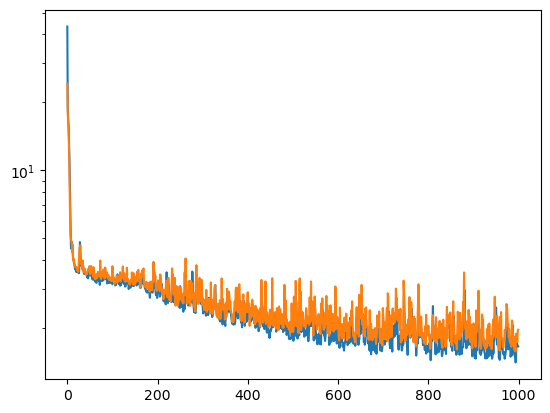

In [22]:
plt.plot(train_loss)
plt.plot(val_loss)
print(train_loss[-1], val_loss[-1])
plt.yscale("log")

In [16]:
data = next(iter(train_loader))
# mean = torch.zeros(data.shape)
# sig = obs_noise * torch.ones(data.shape)
# data += torch.normal(mean,sig)
# data = data.cuda()
data.shape

torch.Size([16, 100, 1])

In [17]:
out, hidden = model(data)
hidden = hidden.cpu().detach().numpy().squeeze()

out.shape, hidden.shape

(torch.Size([16, 100, 1]), (16, 100, 100))

torch.Size([16, 20, 100, 100])


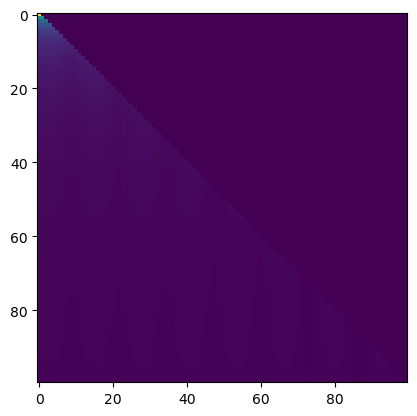

In [25]:
attn_scores = model.transformer.h.attn.attn_scores.cpu().detach().numpy()
print(model.transformer.h.attn.attn_scores.shape)
head_num = 0
plt.imshow(attn_scores[0, head_num])

In [18]:
inds = [50, 99]  # np.arange(10,100,10)
# add a colormap of plasma for inds
net_attn = np.zeros(attn_scores[0, 0].shape)
for head in range(attn_scores.shape[1]):
    plt.figure()
    for ind in inds:
        net_attn += attn_scores[0, head]
        plt.plot(
            attn_scores[0, head, ind], label=ind
        )  # solidly uniform at first, leading to smoothness in output!
    plt.legend()
    plt.xlabel("token index")
    plt.ylabel("attention score")

plt.figure()
for ind in inds:
    plt.plot(net_attn[ind], label=ind)
plt.legend()
plt.xlabel("token index")
plt.ylabel("net attention")
plt.title("Net attention")

NameError: name 'attn_scores' is not defined

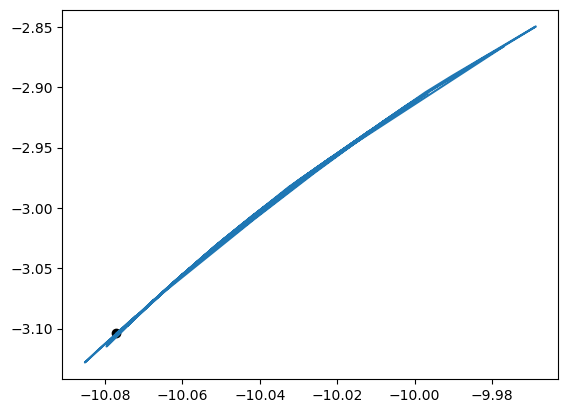

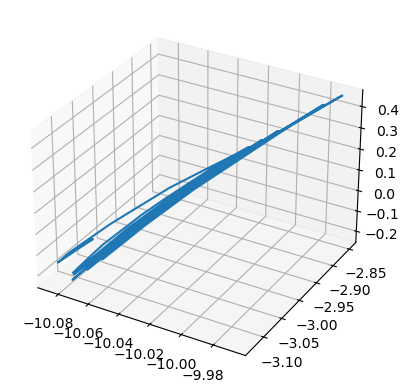

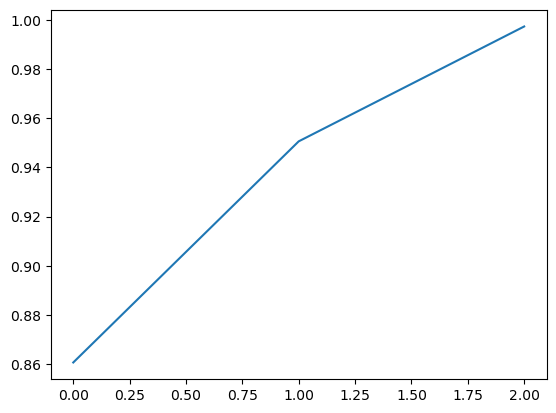

In [20]:
# run pca on the hidden states
from sklearn.decomposition import PCA

# hidden = hidden[]  # washout the first n

pca = PCA(n_components=3)
hflat = hidden.reshape(-1, hidden.shape[-1])
pca.fit(hflat)
hidden_pca = pca.transform(hflat).reshape((hidden.shape[0], hidden.shape[1], -1))

plt.figure()
# plt.plot(hidden_pca[:,0])
# plt.plot(hidden_pca[:,1])
plt.plot(hidden_pca[0, :, 0], hidden_pca[0, :, 1])
plt.scatter(hidden_pca[0, 0, 0], hidden_pca[0, 0, 1], c="black")

# plot in 3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(hidden_pca[0, :, 0], hidden_pca[0, :, 1], hidden_pca[0, :, 2])
plt.figure()
# plot evr
plt.plot(np.cumsum(pca.explained_variance_ratio_))

/tmp/ipykernel_3502346/1051124881.py:7: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  U, S, V = torch.svd(H.T)


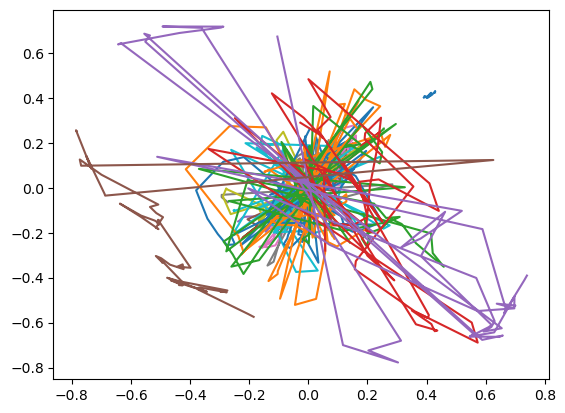

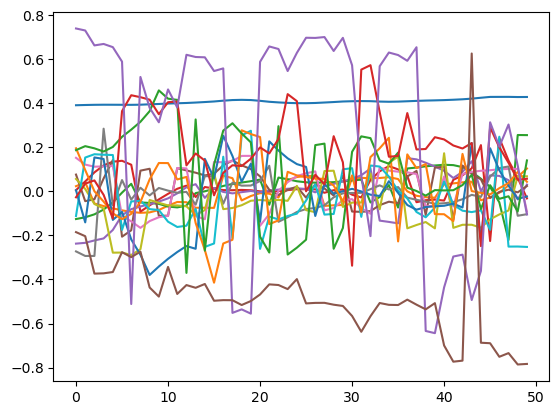

In [33]:
n_delays = 50
delay_interval = 1


H = embed_signal_torch(data, n_delays, delay_interval)

U, S, V = torch.svd(H.T)

V = V.cpu().numpy()
plt.plot(V[:, 0], V[:, 1])
plt.figure()
plt.plot(V[:1000, 0])

In [ ]:
# create a delay embedding with the attended values